기계 번역 실습 / 한국어 문장을 영어로 번역하는 모델 구축 / 총 3가지 모델(Seq2Seq 기본 모델, Attention 적용 모델)을 구현하고 학습시키며, 각 모델의 성능을 비교 분석

## 데이터셋
- 일상생활구어체_train_set.json
- 일상생활구어체_valid_set.json
- JSON 파일 형식 / 한국어 문장("ko") , 영어 번역문("mt")

In [ ]:
import pandas as pd

train_df = pd.read_json('/content/일상생활구어체_train_set.json')
val_df = pd.read_json('/content/일상생활구어체_valid_set.json')

In [ ]:
pd.set_option('display.max_colwidth', None) # 데이터 프레임 열안의 문자열을 길이에 상관없이 전부 출력
train_df[:10]

,data
0,"{'sn': 'INTSALDSUT062119042703238', 'data_set': '일상생활및구어체', 'domain': '해외영업', 'subdomain': '도소매유통', 'ko_original': '원하시는 색상을 회신해 주시면 바로 제작 들어가겠습니다.', 'ko': '원하시는 색상을 회신해 주시면 바로 제작 들어가겠습니다.', 'mt': 'If you reply to the color you want, we will start making it right away.', 'en': 'If you reply to the color you want, we will start making it right away.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 7, 'word_count_en': 15, 'word_ratio': 2.143, 'file_name': 'INTSAL_DSUT.xlsx', 'source': '크라우드소싱', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}"
1,"{'sn': 'KTOS062012215152657', 'data_set': '일상생활및구어체', 'domain': '일상생활', 'subdomain': '여행', 'ko_original': '형님 제일 웃긴 그림이 뭔지 알아요.', 'ko': '형님 제일 웃긴 그림이 뭔지 알아요.', 'mt': 'I know what the funniest picture is.', 'en': 'You know what the funniest picture is.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 6, 'word_count_en': 7, 'word_ratio': 1.167, 'file_name': '여행_KTOS.xlsx', 'source': 'SBS', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}"
2,"{'sn': 'KRSS062012215033840', 'data_set': '일상생활및구어체', 'domain': '일상생활', 'subdomain': '예약', 'ko_original': '>속옷을?', 'ko': '>속옷을?', 'mt': 'Underwear?', 'en': '>Underwear?', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 1, 'word_count_en': 1, 'word_ratio': 1.0, 'file_name': '예약_KRSS.xlsx', 'source': 'SBS', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}"
3,"{'sn': 'INTSALEGKG062119042674878', 'data_set': '일상생활및구어체', 'domain': '해외영업', 'subdomain': '연구개발,과학기술', 'ko_original': '그래도 가격이 꽤 비싸니까 많이 살게요.', 'ko': '그래도 가격이 꽤 비싸니까 많이 살게요.', 'mt': 'However, the price is quite high, so I will buy a lot.', 'en': 'I wont buy a lot though since the price is still quite high.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 6, 'word_count_en': 13, 'word_ratio': 2.167, 'file_name': 'INTSAL_EGKG.xlsx', 'source': '크라우드소싱', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}"
4,"{'sn': 'CUSCHADSUT062119042866224', 'data_set': '일상생활및구어체', 'domain': '해외고객과의채팅', 'subdomain': '도소매유통', 'ko_original': 'AAA님, 제가 회의에서 화를 냈던 점 정말 사과드리고 싶습니다.', 'ko': 'AAA님, 제가 회의에서 화를 냈던 점 정말 사과드리고 싶습니다.', 'mt': 'AAA, I really want to apologize for being upset at the meeting.', 'en': 'Dear AAA, I really want to apologize for my anger at the meeting.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 9, 'word_count_en': 13, 'word_ratio': 1.444, 'file_name': 'CUSCHA_DSUT.xlsx', 'source': '크라우드소싱', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}"
5,"{'sn': 'KFDS062012215029254', 'data_set': '일상생활및구어체', 'domain': '일상생활', 'subdomain': '음식', 'ko_original': '>회식하거든.', 'ko': '>회식하거든.', 'mt': '>We're having a get-together.', 'en': '>We're having a get-together.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 1, 'word_count_en': 4, 'word_ratio': 4.0, 'file_name': '음식_KFDS.xlsx', 'source': 'SBS', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}"
6,"{'sn': 'INTSALEGKG062119042644048', 'data_set': '일상생활및구어체', 'domain': '해외영업', 'subdomain': '연구개발,과학기술', 'ko_original': '돈은 어디에 투자하셨나요?', 'ko': '돈은 어디에 투자하셨나요?', 'mt': 'Where did you invest the money?', 'en': 'Where did you invest the money?', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 3, 'word_count_en': 6, 'word_ratio': 2.0, 'file_name': 'INTSAL_EGKG.xlsx', 'source': '크라우드소싱', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}"
7,"{'sn': 'KTOS062012215156382', 'data_set': '일상생활및구어체', 'domain': '일상생활', 'subdomain': '여행', 'ko_original': '예 이게 빅데이터 빅이네요.', 'ko': '예 이게 빅데이터 빅이네요.', 'mt': 'Yes, this is Big Data Big.', 'en': 'Yes, the is big data is big.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 4, 'word_count_en': 7, 'word_ratio': 1.75, 'file_name': '여행_KTOS.xlsx', 'source': 'S

In [ ]:
df_train_expanded = train_df['data'].apply(pd.Series) # 각 항목을 열(column) 로 분해해서 DataFrame으로 변환
train_df = pd.concat([train_df, df_train_expanded], axis=1)
train_df[:20]

,data,sn,data_set,domain,subdomain,ko_original,ko,mt,en,source_language,target_language,word_count_ko,word_count_en,word_ratio,file_name,source,license,style,included_unknown_words,ner
0,"{'sn': 'INTSALDSUT062119042703238', 'data_set': '일상생활및구어체', 'domain': '해외영업', 'subdomain': '도소매유통', 'ko_original': '원하시는 색상을 회신해 주시면 바로 제작 들어가겠습니다.', 'ko': '원하시는 색상을 회신해 주시면 바로 제작 들어가겠습니다.', 'mt': 'If you reply to the color you want, we will start making it right away.', 'en': 'If you reply to the color you want, we will start making it right away.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 7, 'word_count_en': 15, 'word_ratio': 2.143, 'file_name': 'INTSAL_DSUT.xlsx', 'source': '크라우드소싱', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}",INTSALDSUT062119042703238,일상생활및구어체,해외영업,도소매유통,원하시는 색상을 회신해 주시면 바로 제작 들어가겠습니다.,원하시는 색상을 회신해 주시면 바로 제작 들어가겠습니다.,"If you reply to the color you want, we will start making it right away.","If you reply to the color you want, we will start making it right away.",ko,en,7,15,2.143,INTSAL_DSUT.xlsx,크라우드소싱,open,구어체,False,None
1,"{'sn': 'KTOS062012215152657', 'data_set': '일상생활및구어체', 'domain': '일상생활', 'subdomain': '여행', 'ko_original': '형님 제일 웃긴 그림이 뭔지 알아요.', 'ko': '형님 제일 웃긴 그림이 뭔지 알아요.', 'mt': 'I know what the funniest picture is.', 'en': 'You know what the funniest picture is.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 6, 'word_count_en': 7, 'word_ratio': 1.167, 'file_name': '여행_KTOS.xlsx', 'source': 'SBS', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}",KTOS062012215152657,일상생활및구어체,일상생활,여행,형님 제일 웃긴 그림이 뭔지 알아요.,형님 제일 웃긴 그림이 뭔지 알아요.,I know what the funniest picture is.,You know what the funniest picture is.,ko,en,6,7,1.167,여행_KTOS.xlsx,SBS,open,구어체,False,None
2,"{'sn': 'KRSS062012215033840', 'data_set': '일상생활및구어체', 'domain': '일상생활', 'subdomain': '예약', 'ko_original': '>속옷을?', 'ko': '>속옷을?', 'mt': 'Underwear?', 'en': '>Underwear?', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 1, 'word_count_en': 1, 'word_ratio': 1.0, 'file_name': '예약_KRSS.xlsx', 'source': 'SBS', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}",KRSS062012215033840,일상생활및구어체,일상생활,예약,>속옷을?,>속옷을?,Underwear?,>Underwear?,ko,en,1,1,1.000,예약_KRSS.xlsx,SBS,open,구어체,False,None
3,"{'sn': 'INTSALEGKG062119042674878', 'data_set': '일상생활및구어체', 'domain': '해외영업', 'subdomain': '연구개발,과학기술', 'ko_original': '그래도 가격이 꽤 비싸니까 많이 살게요.', 'ko': '그래도 가격이 꽤 비싸니까 많이 살게요.', 'mt': 'However, the price is quite high, so I will buy a lot.', 'en': 'I wont buy a lot though since the price is still quite high.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 6, 'word_count_en': 13, 'word_ratio': 2.167, 'file_name': 'INTSAL_EGKG.xlsx', 'source': '크라우드소싱', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}",INTSALEGKG062119042674878,일상생활및구어체,해외영업,"연구개발,과학기술",그래도 가격이 꽤 비싸니까 많이 살게요.,그래도 가격이 꽤 비싸니까 많이 살게요.,"However, the price is quite high, so I will buy a lot.",I wont buy a lot though since the price is still quite high.,ko,en,6,13,2.167,INTSAL_EGKG.xlsx,크라우드소싱,open,구어체,False,None
4,"{'sn': 'CUSCHADSUT062119042866224', 'data_set': '일상생활및구어체', 'domain': '해외고객과의채팅', 'subdomain': '도소매유통', 'ko_original': 'AAA님, 제가 회의에서 화를 냈던 점 정말 사과드리고 싶습니다.', 'ko': 'AAA님, 제가 회의에서 화를 냈던 점 정말 사과드리고 싶습니다.', 'mt': 'AAA, I really want to apologize for being upset at the meeting.', 'en': 'Dear AAA, I really want to apologize for my anger at the meeting.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 9, 'word_count_en': 13, 'word_ratio': 1.444, 'file_name': 'CUSCHA_DSUT.xlsx', 'source': '크라우드소싱', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}",CUSCHADSUT062119042866224,일상생활및구어체,해외고객과의채팅,도소매유통,"AAA님, 제가 회의에서 화를 냈던 점 정말 사과드리고 싶습니다.","AAA님, 제가 회의에서 화를 냈던 점 정말 사과드리고 싶습니다.","AAA, I really want to apologize for being upset at the meeting.","Dear AAA, I reall

In [ ]:
df_val_expanded = val_df['data'].apply(pd.Series) # 각 항목을 열(column) 로 분해해서 DataFrame으로 변환
val_df = pd.concat([val_df, df_val_expanded], axis=1)

In [ ]:
train_df[-20:]

,data,sn,data_set,domain,subdomain,ko_original,ko,mt,en,source_language,target_language,word_count_ko,word_count_en,word_ratio,file_name,source,license,style,included_unknown_words,ner
1199980,"{'sn': 'CUSCHADSUT0621190428142181', 'data_set': '일상생활및구어체', 'domain': '해외고객과의채팅', 'subdomain': '도소매유통', 'ko_original': '왜 그들은 또 나빠요?', 'ko': '왜 그들은 또 나빠요?', 'mt': 'Why are they bad again?', 'en': 'How come that they are bad again?', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 4, 'word_count_en': 7, 'word_ratio': 1.75, 'file_name': 'CUSCHA_DSUT.xlsx', 'source': '크라우드소싱', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}",CUSCHADSUT0621190428142181,일상생활및구어체,해외고객과의채팅,도소매유통,왜 그들은 또 나빠요?,왜 그들은 또 나빠요?,Why are they bad again?,How come that they are bad again?,ko,en,4,7,1.750,CUSCHA_DSUT.xlsx,크라우드소싱,open,구어체,False,None
1199981,"{'sn': 'KRSS062012215023215', 'data_set': '일상생활및구어체', 'domain': '일상생활', 'subdomain': '예약', 'ko_original': '>이게 감정이 더 심해졌어.', 'ko': '>이게 감정이 더 심해졌어.', 'mt': '> This made my emotions worse.', 'en': '>Your emotions got worse.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 4, 'word_count_en': 4, 'word_ratio': 1.0, 'file_name': '예약_KRSS.xlsx', 'source': 'SBS', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}",KRSS062012215023215,일상생활및구어체,일상생활,예약,>이게 감정이 더 심해졌어.,>이게 감정이 더 심해졌어.,> This made my emotions worse.,>Your emotions got worse.,ko,en,4,4,1.000,예약_KRSS.xlsx,SBS,open,구어체,False,None
1199982,"{'sn': 'INTSALJBTS062119042547429', 'data_set': '일상생활및구어체', 'domain': '해외영업', 'subdomain': '정보통신', 'ko_original': '다시 한 번 오늘 미팅에 시간 내 주신 점 고개 숙여 감사드립니다.', 'ko': '다시 한 번 오늘 미팅에 시간 내 주신 점 고개 숙여 감사드립니다.', 'mt': 'Once again, thank you for your time at today's meeting.', 'en': 'Once again, thank you for your time at today's meeting.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 12, 'word_count_en': 10, 'word_ratio': 0.833, 'file_name': 'INTSAL_JBTS.xlsx', 'source': '크라우드소싱', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}",INTSALJBTS062119042547429,일상생활및구어체,해외영업,정보통신,다시 한 번 오늘 미팅에 시간 내 주신 점 고개 숙여 감사드립니다.,다시 한 번 오늘 미팅에 시간 내 주신 점 고개 숙여 감사드립니다.,"Once again, thank you for your time at today's meeting.","Once again, thank you for your time at today's meeting.",ko,en,12,10,0.833,INTSAL_JBTS.xlsx,크라우드소싱,open,구어체,False,None
1199983,"{'sn': 'INTSALDSUT0621190427316235', 'data_set': '일상생활및구어체', 'domain': '해외영업', 'subdomain': '도소매유통', 'ko_original': '청소하는 사람이 오래 머물지 않는다는 얘기를 듣고 저는 분노를 금치 못했습니다.', 'ko': '청소하는 사람이 오래 머물지 않는다는 얘기를 듣고 저는 분노를 금치 못했습니다.', 'mt': 'I am furious to hear that the cleaner does not stay for very long.', 'en': 'I am furious to hear that the cleaner does not stay for very long.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 11, 'word_count_en': 14, 'word_ratio': 1.2730000000000001, 'file_name': 'INTSAL_DSUT.xlsx', 'source': '크라우드소싱', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}",INTSALDSUT0621190427316235,일상생활및구어체,해외영업,도소매유통,청소하는 사람이 오래 머물지 않는다는 얘기를 듣고 저는 분노를 금치 못했습니다.,청소하는 사람이 오래 머물지 않는다는 얘기를 듣고 저는 분노를 금치 못했습니다.,I am furious to hear that the cleaner does not stay for very long.,I am furious to hear that the cleaner does not stay for very long.,ko,en,11,14,1.273,INTSAL_DSUT.xlsx,크라우드소싱,open,구어체,False,None
1199984,"{'sn': 'KTOS0620122151146137', 'data_set': '일상생활및구어체', 'domain': '일상생활', 'subdomain': '여행', 'ko_original': '>명인만두 아니에요, 명인만두 아니에요.', 'ko': '>명인만두 아니에요, 명인만두 아니에요.', 'mt': '> It's not Myungin Dumpling. It's not Myungin Dumpling.', 'en': '> It's not Myeongin Dumpling. It's not Myeongin Dumpling.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 4, 'word_count_en': 9, 'word_ratio': 2.25, 'file_name': '여행_KTOS.xlsx', 'source': 'SBS', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}",KTOS0620122151146137,일상생활및구어체,일상생활,여행,">명인만두 아니에요, 명인만두 아니에요.",">명인만두 아니에요, 명

In [ ]:
val_df[-10:]

,data,sn,data_set,domain,subdomain,ko_original,ko,mt,en,source_language,target_language,word_count_ko,word_count_en,word_ratio,file_name,source,license,style,included_unknown_words,ner
149990,"{'sn': 'INTSALFNIN062119042601328', 'data_set': '일상생활및구어체', 'domain': '해외영업', 'subdomain': '금융,보험', 'ko_original': '곧 새 전철도 이 지역으로 뚫리고 상권도 점점 더 발달할 기미가 보입니다.', 'ko': '곧 새 전철도 이 지역으로 뚫리고 상권도 점점 더 발달할 기미가 보입니다.', 'mt': 'Soon, the new subway will be opened to this area, and commercial districts are showing signs of further development.', 'en': 'Soon, the new subway will be opened to this area, and commercial districts are showing signs of further development.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 12, 'word_count_en': 19, 'word_ratio': 1.583, 'file_name': 'INTSAL_FNIN.xlsx', 'source': '크라우드소싱', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}",INTSALFNIN062119042601328,일상생활및구어체,해외영업,"금융,보험",곧 새 전철도 이 지역으로 뚫리고 상권도 점점 더 발달할 기미가 보입니다.,곧 새 전철도 이 지역으로 뚫리고 상권도 점점 더 발달할 기미가 보입니다.,"Soon, the new subway will be opened to this area, and commercial districts are showing signs of further development.","Soon, the new subway will be opened to this area, and commercial districts are showing signs of further development.",ko,en,12,19,1.583,INTSAL_FNIN.xlsx,크라우드소싱,open,구어체,False,None
149991,"{'sn': 'INTSALDSUT0621190427238984', 'data_set': '일상생활및구어체', 'domain': '해외영업', 'subdomain': '도소매유통', 'ko_original': '2019년 8월 4일에 배송해주신 상품이 잘 도착했습니다.', 'ko': '2019년 8월 4일에 배송해주신 상품이 잘 도착했습니다.', 'mt': 'The product you delivered on August 4, 2019 has arrived.', 'en': 'The product you delivered on August 4, 2019 arrived safely.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 7, 'word_count_en': 10, 'word_ratio': 1.429, 'file_name': 'INTSAL_DSUT.xlsx', 'source': '크라우드소싱', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}",INTSALDSUT0621190427238984,일상생활및구어체,해외영업,도소매유통,2019년 8월 4일에 배송해주신 상품이 잘 도착했습니다.,2019년 8월 4일에 배송해주신 상품이 잘 도착했습니다.,"The product you delivered on August 4, 2019 has arrived.","The product you delivered on August 4, 2019 arrived safely.",ko,en,7,10,1.429,INTSAL_DSUT.xlsx,크라우드소싱,open,구어체,False,None
149992,"{'sn': 'KFDS0620122150126915', 'data_set': '일상생활및구어체', 'domain': '일상생활', 'subdomain': '음식', 'ko_original': '>어떻게요?', 'ko': '>어떻게요?', 'mt': '>How?', 'en': '>How?', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 1, 'word_count_en': 1, 'word_ratio': 1.0, 'file_name': '음식_KFDS.xlsx', 'source': 'SBS', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}",KFDS0620122150126915,일상생활및구어체,일상생활,음식,>어떻게요?,>어떻게요?,>How?,>How?,ko,en,1,1,1.000,음식_KFDS.xlsx,SBS,open,구어체,False,None
149993,"{'sn': 'CUSCHADSUT0621190428131932', 'data_set': '일상생활및구어체', 'domain': '해외고객과의채팅', 'subdomain': '도소매유통', 'ko_original': '제 주문에 대한 선적 상황을 즉시 알려주시기 바랍니다.', 'ko': '제 주문에 대한 선적 상황을 즉시 알려주시기 바랍니다.', 'mt': 'Please inform me of the shipment status of my order immediately.', 'en': 'Kindly notify me immediately regarding to the shipping situation of my order.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 8, 'word_count_en': 12, 'word_ratio': 1.5, 'file_name': 'CUSCHA_DSUT.xlsx', 'source': '크라우드소싱', 'license': 'open', 'style': '구어체', 'included_unknown_words': False, 'ner': None}",CUSCHADSUT0621190428131932,일상생활및구어체,해외고객과의채팅,도소매유통,제 주문에 대한 선적 상황을 즉시 알려주시기 바랍니다.,제 주문에 대한 선적 상황을 즉시 알려주시기 바랍니다.,Please inform me of the shipment status of my order immediately.,Kindly notify me immediately regarding to the shipping situation of my order.,ko,en,8,12,1.500,CUSCHA_DSUT.xlsx,크라우드소싱,open,구어체,False,None
149994,"{'sn': 'KFDS0620122150106611', 'data_set': '일상생활및구어체', 'domain': '일상생활', 'subdomain': '음식', 'ko_original': '> 그럼요.', 'ko': '> 그럼요.', 'mt': '> Of course.', 'en': '>Of course.', 'source_language': 'ko', 'target_language': 'en', 'word_count_ko': 2, 'word_count_en': 2, 'word_ratio': 1.0, 'file_name': '음식_KFDS.xlsx', 'source': 'SB

### data의 컬럼별 의미를 파악하고 , 모델의 학습에 어떤 컬럼을 사용할지 결정

## ko 와 ko_original의 차이점 확인하기

In [ ]:
print(train_df['ko'][0])
print(train_df['ko_original'][0])

원하시는 색상을 회신해 주시면 바로 제작 들어가겠습니다.
원하시는 색상을 회신해 주시면 바로 제작 들어가겠습니다.


In [ ]:
diff_df = train_df[train_df['ko'] != train_df['ko_original']]

# 몇 개 샘플 확인
diff_df[['ko_original', 'ko']].head(50)

,ko_original,ko
5066,위생적인 ​​세척과 긴 수명을 위해 고품질 소재로 만들어졌습니다.,위생적인 세척과 긴 수명을 위해 고품질 소재로 만들어졌습니다.
20347,​이와 같은 열차를 포함합니다.,이와 같은 열차를 포함합니다.
21497,​각각 고유한 디자인을 가진 30개의 이 제품을 구비한 제품입니다.,각각 고유한 디자인을 가진 30개의 이 제품을 구비한 제품입니다.
34241,"우리의 제품은 영국, 프랑스, ​​독일 및 기타 국가 및 지역으로 수출됩니다.","우리의 제품은 영국, 프랑스, 독일 및 기타 국가 및 지역으로 수출됩니다."
42372,저희는 이곳을 영원한 보금자리로 ​만들 계획입니다.,저희는 이곳을 영원한 보금자리로 만들 계획입니다.
46743,"우리의 제품은 미국, 영국, 독일, 프랑스, ​​노르웨이, 스웨덴, 캐나다 및 호주와 같은 30개 이상의 국가에서 잘 판매됩니다.","우리의 제품은 미국, 영국, 독일, 프랑스, 노르웨이, 스웨덴, 캐나다 및 호주와 같은 30개 이상의 국가에서 잘 판매됩니다."
69254,​이 피규어를 플레이 세트에 가져와 액션에 생동감을 불어넣으세요.,이 피규어를 플레이 세트에 가져와 액션에 생동감을 불어넣으세요.
89888,품질 우리의 ​​R&D와 효과적인 운영은 좋은 생산 기반을 만듭니다.,품질 우리의 R&D와 효과적인 운영은 좋은 생산 기반을 만듭니다.
159766,럭스 라운저 반려동물 침대는 반려동물의 체중 및 윤곽에 맞게 폼이 메모리폼이 적용되어 통증이 있는 ​​근육과 관절의 불편함을 전반적으로 개선하고 완화합니다.,럭스 라운저 반려동물 침대는 반려동물의 체중 및 윤곽에 맞게 폼이 메모리폼이 적용되어 통증이 있는 근육과 관절의 불편함을 전반적으로 개선하고 완화합니다.
175503,"​수집, 경주, 거래에 적합합니다.","수집, 경주, 거래에 적합합니다."


In [ ]:
for i, row in diff_df[['ko_original', 'ko']].head(10).iterrows():
    print(f"[{i}]")
    for a, b in zip(row['ko_original'], row['ko']):
        if a != b:
            print(f" 차이 발견: '{a}' vs '{b}'")
    if row['ko_original'] != row['ko']:
        print("   전체 문자열 차이 있음")
    print("-" * 40)

[5066]
 차이 발견: '​' vs '세'
 차이 발견: '​' vs '척'
 차이 발견: '세' vs '과'
 차이 발견: '척' vs ' '
 차이 발견: '과' vs '긴'
 차이 발견: '긴' vs '수'
 차이 발견: ' ' vs '명'
 차이 발견: '수' vs '을'
 차이 발견: '명' vs ' '
 차이 발견: '을' vs '위'
 차이 발견: ' ' vs '해'
 차이 발견: '위' vs ' '
 차이 발견: '해' vs '고'
 차이 발견: ' ' vs '품'
 차이 발견: '고' vs '질'
 차이 발견: '품' vs ' '
 차이 발견: '질' vs '소'
 차이 발견: ' ' vs '재'
 차이 발견: '소' vs '로'
 차이 발견: '재' vs ' '
 차이 발견: '로' vs '만'
 차이 발견: ' ' vs '들'
 차이 발견: '만' vs '어'
 차이 발견: '들' vs '졌'
 차이 발견: '어' vs '습'
 차이 발견: '졌' vs '니'
 차이 발견: '습' vs '다'
 차이 발견: '니' vs '.'
   전체 문자열 차이 있음
----------------------------------------
[20347]
 차이 발견: '​' vs '이'
 차이 발견: '이' vs '와'
 차이 발견: '와' vs ' '
 차이 발견: ' ' vs '같'
 차이 발견: '같' vs '은'
 차이 발견: '은' vs ' '
 차이 발견: ' ' vs '열'
 차이 발견: '열' vs '차'
 차이 발견: '차' vs '를'
 차이 발견: '를' vs ' '
 차이 발견: ' ' vs '포'
 차이 발견: '포' vs '함'
 차이 발견: '함' vs '합'
 차이 발견: '합' vs '니'
 차이 발견: '니' vs '다'
 차이 발견: '다' vs '.'
   전체 문자열 차이 있음
----------------------------------------
[21497]
 차이 발견: '​' vs '각'
 차이 발견: 

- ko_original 문장의 맨 앞이나 뒤에 공백이 존재해서 ko_orignal 과 ko가 다른 경우가 발생
- 문장 앞뒤의 공백까지 처리가 된 ko 컬럼 사용

## mt 와 en 컬럼의 차이점 파악하기

- 한글 문장의 번역이 mt 컬럼이 en컬럼보다 더 자연스러운 경우와 / en컬럼이 mt컬럼보다 더 자연스러운 경우 / mt, en 둘다 해석이 어색한 경우 존재

- mt 컬럼의 번역이 더 자연스러운 경우
 - ko : 왜 그들은 또 나빠요?	mt : Why are they bad again? en : How come that they are bad again?
 - ko: 야이, 씨! mt : Hey, shit! en : See?

- en 컬럼의 번역이 더 자연스러운 경우
 -  'ko_original': '>야.', 'ko': '>야.', 'mt': 'It's', 'en': '>Hey.'


- mt / en 둘다 해석이 어색한 문장도 존재
 - 꼈잖아요	mt : I put it on.	en : We put it on.

## 해결 방안
- 1단계: 의미 유사도 계산
 - SentenceTransformer로 ko, mt, en 각각 임베딩
 - cosine similarity(sim_mt, sim_en) 계산
- 2단계: 더 유사한 번역 선택
- 3단계: 품질 기준선 이하 -> 제외


In [ ]:
# 문제 있었던 문장들로 미리 예시 실험

from sentence_transformers import SentenceTransformer, util

# 모델 로딩
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# 테스트 문장 리스트
examples = [
    ("왜 그들은 또 나빠요?", "Why are they bad again?", "How come that they are bad again?"),
    ("야이, 씨!", "Hey, shit!", "See?"),
    ("꼈잖아요", "I put it on.", "We put it on."),
    (">야.", "It's", ">Hey."),
]

# 유사도 판단 및 선택
for ko, mt, en in examples:
    embeddings = model.encode([ko, mt, en], convert_to_tensor=True)
    sim_mt = util.cos_sim(embeddings[0], embeddings[1]).item()
    sim_en = util.cos_sim(embeddings[0], embeddings[2]).item()

    # 선택 기준 적용
    if max(sim_mt, sim_en) < 0.55:
        selected = "exclude"
    elif sim_mt >= sim_en:
        selected = "mt"
    else:
        selected = "en"

    # 결과 출력
    print(f"\n[KO] {ko}")
    print(f"MT: {mt} | sim_mt = {sim_mt:.4f}")
    print(f"EN: {en} | sim_en = {sim_en:.4f}")
    print(f"➡ 선택: {selected}")


[KO] 왜 그들은 또 나빠요?
MT: Why are they bad again? | sim_mt = 0.9116
EN: How come that they are bad again? | sim_en = 0.9321
➡ 선택: en

[KO] 야이, 씨!
MT: Hey, shit! | sim_mt = 0.9250
EN: See? | sim_en = 0.5176
➡ 선택: mt

[KO] 꼈잖아요
MT: I put it on. | sim_mt = 0.3751
EN: We put it on. | sim_en = 0.3719
➡ 선택: exclude

[KO] >야.
MT: It's | sim_mt = 0.5635
EN: >Hey. | sim_en = 0.7835
➡ 선택: en


- 야이, 씨!, 야, 같은경우 잘 번역된 문장을 잘 선택했고 / 꼈잖아요 같은 경우도 제외를 잘 시켰다
- 다만 첫번째 문장의 경우 유사도가 둘다 0.9를 넘고 / en의 유사도가 더 높게 나왔지만 번역이 mt가 더 자연스러우므로 유사도가 둘다 어느정도 수치(0.8) 이상일땐 mt의 번역을 넣도록 코드를 수정한다

## train_data / val_data sampling
- 기존 : train_data = 120만개 / val_data = 15만개
- 학습데이터 120만개를 다 사용했을때 1 epoch을 학습하는데 T4 GPU를 기준으로 2시간 50분이 걸렸음
- 학습에 너무 많은 시간이 소요가 됨으로 Train_data -> 6만개 / val_data -> 3만개로 샘플링을 해서 사용

In [ ]:
! pip install pandas sentence-transformers

In [ ]:
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# 1. 샘플링
sample_df_train = train_df.sample(n=60000, random_state=42).reset_index(drop=True)
sample_df_val = val_df.sample(n=30000, random_state=42).reset_index(drop=True)

# 2. 모델 로딩
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# 3. 공통 처리 함수 정의
def compute_similarity(df, desc="처리 중"):
    sim_mt_list = []
    sim_en_list = []
    selected_list = []

    for _, row in tqdm(df.iterrows(), total=len(df), desc=desc):
        ko, mt, en = row["ko"], row["mt"], row["en"]

        # 문장 임베딩
        embeddings = model.encode([str(ko), str(mt), str(en)], convert_to_tensor=True)
        sim_mt = util.cos_sim(embeddings[0], embeddings[1]).item()
        sim_en = util.cos_sim(embeddings[0], embeddings[2]).item()

        sim_mt_list.append(sim_mt)
        sim_en_list.append(sim_en)

        # 선택 로직
        if sim_mt >= 0.8 and sim_en >= 0.8:
            selected = "mt"
        elif sim_mt >= 0.8:
            selected = "mt"
        elif max(sim_mt, sim_en) < 0.5:
            selected = "exclude"
        elif sim_mt >= sim_en:
            selected = "mt"
        else:
            selected = "en"

        selected_list.append(selected)

    # 결과 컬럼 추가
    df["sim_mt"] = sim_mt_list
    df["sim_en"] = sim_en_list
    df["selected"] = selected_list

    # 필요한 컬럼만 유지
    return df[["subdomain", "ko", "mt", "en", "sim_mt", "sim_en", "selected"]]

# 4. 처리 실행
sample_df_train = compute_similarity(sample_df_train, desc="Train 처리 중")
sample_df_val = compute_similarity(sample_df_val, desc="Val 처리 중")

# 5. 결과 저장
sample_df_train.to_csv("train_translation_selection_result.csv", index=False)
sample_df_val.to_csv("val_translation_selection_result.csv", index=False)

print("✅ 완료: 두 파일 저장됨 (train_translation_selection_result.csv, val_translation_selection_result.csv)")

Val 처리 중: 100%|██████████| 30000/30000 [06:33<00:00, 76.18it/s]


✅ 완료: 두 파일 저장됨 (train_translation_selection_result.csv, val_translation_selection_result.csv)


In [ ]:
train_df = pd.read_csv('/content/train_translation_selection_result.csv')
val_df = pd.read_csv('/content/val_translation_selection_result.csv')

In [ ]:
train_df[:10]

,subdomain,ko,mt,en,sim_mt,sim_en,selected
0,여행,>많이 나갔으니까.,> Because I've been out a lot.,>Because he participated in many course.,0.327353,0.170597,exclude
1,음식,">바꿀 기회 줘요, 말아요?",>Do you want me to change it or not?,>Do you want to change or not?,0.421915,0.379633,exclude
2,음식,">하나, 둘, 셋, 넷, 다섯.",">One, two, three, four, five.",">One, two, three, four, five.",0.992079,0.992079,mt
3,도소매유통,마모 손상 등을 인지할 수 있게 되니 임차 종료 시 배상을 청구받으실 가능성도 줄게 될 겁니다.,"Wear and tear damage can be acknowledged, meaning you are less likely to be charged at the end of your contract.","Wear and tear damage can be acknowledged, meaning you are less likely to be charged at the end of your contract.",0.640494,0.640494,mt
4,예약,>그냥 자연스럽게.,> Just naturally.,>Just naturally.,0.850837,0.850370,mt
5,여행,>그렇게까지?,> That much?,> Did you have to?,0.539694,0.397027,mt
6,"기계장비,의료정밀",곧 회신을 받을 수 있기를 기다리겠습니다.,We look forward to receiving your reply soon.,I look forward to hearing from you soon.,0.664706,0.676987,en
7,도소매유통,저희 회사에서는 회사동료 간의 관계를 중요시 여깁니다.,"At our company, we value the relationship between co-workers.",Our company values the relationship between company colleagues.,0.839845,0.924967,mt
8,구매,>네.,>Yes.,>Yes.,0.772743,0.772743,mt
9,예약,쭈뼛쭈뼛하니까 네가 테이블 위로 올라가서 마셔!,"I'm a bit shy, so go up to the table and drink!","Everyone was a bit hesitant , so you got on the table and yelled ""let's drink!""",0.747891,0.672468,mt


In [ ]:
val_df[:10]

,subdomain,ko,mt,en,sim_mt,sim_en,selected
0,여행,왜냐하면 쟤가 마지막에 그걸 당했잖아요 저한테.,Because he was attacked at the end. To me.,Because he was attacked at the end. To me.,0.597489,0.597489,mt
1,"연구개발,과학기술",그래야 그게 또 신호가 돼서 투쟁 도피 반응을 통해 무시됐던 기능들이 다시 시작됩니다.,Only then will it become a signal and the functions that were ignored through the struggle escape reaction resume.,Only then will it become a signal and the functions that were ignored through the struggle escape reaction resume.,0.839844,0.839844,mt
2,도소매유통,저희가 꼭 그 물건이 필요한데 같은 상품을 파는 다른 회사가 있을까요?,We really need it. Is there any other company that sells the same product?,We really need that item. Is there any other company that sells the same product?,0.852790,0.876154,mt
3,도소매유통,"친애하는 AAA1님, BBB회사의 해외 영업팀 AAA2입니다.","Dear AAA1, This is AAA2, the overseas sales team of BBB company.","Dear AAA1, I'm AAA2, BBB's overseas sales team.",0.951349,0.841102,mt
4,도소매유통,때문에 귀하의 회사에 합류해 Berlin 에서 체인점을 열고 싶습니다.,So I would like to join your company and open a chain store in Berlin.,"Therefore, I would like to join your company and open a chain store in Berlin.",0.943549,0.944239,mt
5,"연구개발,과학기술",저희도 피해자라는 사실을 인지해 주셨으면 좋겠습니다.,"I hope you know that we are victims, too.","I hope you know that we are victims, too.",0.847952,0.847952,mt
6,도소매유통,"한국에서는 다양한 과일들이 생산되며, 과일 소비가 많습니다.","Various fruits are produced in Korea, and fruit consumption is high.","Various fruits are produced in Korea, and fruit consumption is high.",0.947587,0.947587,mt
7,구매,">오 사부님, 이거, 이거 진짜 쑥스러워하지 마요.","Master Oh, don't be shy about this.","> Master Oh, please don't be shy about this.",0.644194,0.646265,en
8,여행,>그렇지.,>That's right.,>Yes.,0.623081,0.685988,en
9,도소매유통,이것은 그녀의 메인 채널에 없습니다.,This isn't on her main channel.,This isn't on her main channel.,0.965243,0.965243,mt


In [ ]:
train_df[train_df_['selected'] == 'exclude']

,subdomain,ko,mt,en,sim_mt,sim_en,selected
0,여행,>많이 나갔으니까.,> Because I've been out a lot.,>Because he participated in many course.,0.327353,0.170597,exclude
1,음식,">바꿀 기회 줘요, 말아요?",>Do you want me to change it or not?,>Do you want to change or not?,0.421915,0.379633,exclude
16,구매,">아, 이거 따개비밥.","Oh, this is a bowl of rice.",">Oh, this is a bowl of rice.",0.314610,0.364543,exclude
30,음식,>둘 다 사셔도 돼요.,You can buy both.,>You can buy both.,0.369661,0.410110,exclude
63,여행,>사진 많이 찍혀.,> Take a lot of pictures.,> People will take a lot of pictures.,0.371144,0.330599,exclude
...,...,...,...,...,...,...,...
59930,구매,>올라가줘야 해요.,> You have to go up.,> She has to go up.,0.250805,0.196090,exclude
59940,음식,>그런가 본데?,I guess so.,>I guess so.,0.323174,0.383899,exclude
59946,음식,">안 맞는 거야, 현실하고.",">It doesn't fit, it's reality.",>It doesn't fit with reality.,0.442632,0.372326,exclude
59947,음식,저 잘난 체.,That condescending side.,That patronizing attitude.,0.400263,0.330074,exclude


In [ ]:
train_df[train_df['selected'] == 'exclude'][:20]

,subdomain,ko,mt,en,sim_mt,sim_en,selected
0,여행,>많이 나갔으니까.,> Because I've been out a lot.,>Because he participated in many course.,0.327353,0.170597,exclude
1,음식,">바꿀 기회 줘요, 말아요?",>Do you want me to change it or not?,>Do you want to change or not?,0.421915,0.379633,exclude
16,구매,">아, 이거 따개비밥.","Oh, this is a bowl of rice.",">Oh, this is a bowl of rice.",0.314610,0.364543,exclude
30,음식,>둘 다 사셔도 돼요.,You can buy both.,>You can buy both.,0.369661,0.410110,exclude
63,여행,>사진 많이 찍혀.,> Take a lot of pictures.,> People will take a lot of pictures.,0.371144,0.330599,exclude
65,부동산,그러면 언제쯤 살 사람이 나올까요?,When will the person who will buy it come out?,When will there be a potential buyer?,0.427958,0.388897,exclude
88,구매,">아니, 지금 사고 있어요.","> No, I'm buying it now.","> No, I'm buying it now.",0.356586,0.356586,exclude
93,"숙박,음식점",따로 식기나 일회용기를 받을 수 있을까요?,Can I get a separate dishware or disposable machine?,Can I get a separate dishware or disposable machine?,0.484032,0.484032,exclude
97,예약,>뭔가 닮았더라고요.,>You look like something.,>The baby looked like me in some way.,0.419353,0.207827,exclude
100,"기계장비,의료정밀",과자 부스러기를 받을 수 있도록 고안된 거지요?,"It's designed to receive crumbs, right?","It's designed to receive crumbs, right?",0.479576,0.479576,exclude


- 6096개의 데이터가 exclude의 대상에 들어감
- 대체적으로 둘다 해석이 어색한 경우는 드물고 , 특수 기호가 들어간 문장과 그렇지 않은 문장간의 유사도 수치의 차이가 있음



- exclude의 판단 기준을 0.5 -> 0.4로 조정

In [ ]:
import pandas as pd

# 1. 파일 불러오기
train_df = pd.read_csv("train_translation_selection_result.csv")
val_df = pd.read_csv("val_translation_selection_result.csv")

# 2. 처리 함수 정의
def prepare_data(df):
    # 1) 제외 기준 적용
    exclude_mask = (df["sim_mt"] < 0.4) & (df["sim_en"] < 0.4)
    df = df[~exclude_mask].copy()

    # 2) tgt 선택 규칙
    def choose_tgt(row):
        if row["sim_mt"] >= 0.8 and row["sim_en"] >= 0.8:
            return row["mt"]  # 둘 다 높으면 mt 우선
        elif row["sim_mt"] > row["sim_en"]:
            return row["mt"]
        else:
            return row["en"]

    df["tgt"] = df.apply(choose_tgt, axis=1)

    # 3) src = ko
    df = df.rename(columns={"ko": "src"})

    # 4) 필요한 컬럼만 반환
    return df[["src", "tgt"]]

# 3. 데이터 생성
train_data = prepare_data(train_df)
val_data = prepare_data(val_df)

# 4. 저장
train_data.to_csv("final_train_data.csv", index=False)
val_data.to_csv("final_val_data.csv", index=False)

# 5. 확인 출력
print(f" 최종 학습 데이터 수: {len(train_data)}")
print(f" 최종 검증 데이터 수: {len(val_data)}")

 최종 학습 데이터 수: 57052
 최종 검증 데이터 수: 28515


In [ ]:
train_data

,src,tgt
1,">바꿀 기회 줘요, 말아요?",>Do you want me to change it or not?
2,">하나, 둘, 셋, 넷, 다섯.",">One, two, three, four, five."
3,마모 손상 등을 인지할 수 있게 되니 임차 종료 시 배상을 청구받으실 가능성도 줄게 될 겁니다.,"Wear and tear damage can be acknowledged, meaning you are less likely to be charged at the end of your contract."
4,>그냥 자연스럽게.,> Just naturally.
5,>그렇게까지?,> That much?
...,...,...
59995,"물론, 우리는 지적 재산권 사용 권한을 먼저 특허합니다.","Sure, we patent the intellectual property usage rights first."
59996,저희는 새로운 제품에 대해 매우 기대하고 있습니다.,We are very excited about the new product.
59997,> 이런 게 정말 많아요.,> There's a lot of this.
59998,그러니깐요. 2만병을 공급 가능할까요?,"So. Can you supply 20,000 bottles?"


In [ ]:
val_data

,src,tgt
0,왜냐하면 쟤가 마지막에 그걸 당했잖아요 저한테.,Because he was attacked at the end. To me.
1,그래야 그게 또 신호가 돼서 투쟁 도피 반응을 통해 무시됐던 기능들이 다시 시작됩니다.,Only then will it become a signal and the functions that were ignored through the struggle escape reaction resume.
2,저희가 꼭 그 물건이 필요한데 같은 상품을 파는 다른 회사가 있을까요?,We really need it. Is there any other company that sells the same product?
3,"친애하는 AAA1님, BBB회사의 해외 영업팀 AAA2입니다.","Dear AAA1, This is AAA2, the overseas sales team of BBB company."
4,때문에 귀하의 회사에 합류해 Berlin 에서 체인점을 열고 싶습니다.,So I would like to join your company and open a chain store in Berlin.
...,...,...
29995,내 최종 결정은 다음 주에 보낼 수 있다.,My final decision can be sent next week.
29996,>막아야 돼!,> We have to block it!
29997,욕실 등 습기가 많은 장소에서 사용하지 마세요.,Do not use it in humid places such as bathrooms.
29998,다만 국가 기록 센터에 남겨질 자료라면 다각도의 확인 작업을 곁들여야 하는 게 분명합니다.,"However, if the data will be left at the National Records Center, it is clear that it should be accompanied by various confirmations."


## 데이터 전처리

- 적절한 토크나이저 선택 -> 한국어, 영어 문장 토큰화
- 문장 길이를 분석하여, 전체 문장의 길이에 맞게 최대 길이(MAX_LENGTH)를 설정하고, 필요한 경우 SOS, EOS, PAD, UNK 등의 특수 토큰을 정의합니다.

## 토크나이저
- 한국어에는 Mecab, 영어에는 nltk를 활용하여 형태소 분석과 토큰화를 진행하였고,
의미 보존이 중요한 번역 태스크 특성상 불용어 제거는 적용하지 않았습니다.


In [ ]:
# 필요 모둘 설치
!pip install python-mecab-ko

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 580.9/580.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 70.7 MB/s eta 0:00:00


In [ ]:
from mecab import MeCab

In [ ]:
mecab = MeCab()

In [ ]:
train_data['morphs'] = train_data['src'].apply(mecab.morphs)

In [ ]:
val_data['morphs'] = val_data['src'].apply(mecab.morphs)

In [ ]:
train_data

,src,tgt,morphs
1,">바꿀 기회 줘요, 말아요?",>Do you want me to change it or not?,"[>, 바꿀, 기회, 줘요, ,, 말, 아요, ?]"
2,">하나, 둘, 셋, 넷, 다섯.",">One, two, three, four, five.","[>, 하나, ,, 둘, ,, 셋, ,, 넷, ,, 다, 섯, .]"
3,마모 손상 등을 인지할 수 있게 되니 임차 종료 시 배상을 청구받으실 가능성도 줄게...,"Wear and tear damage can be acknowledged, mean...","[마모, 손상, 등, 을, 인지, 할, 수, 있, 게, 되, 니, 임차, 종료, 시..."
4,>그냥 자연스럽게.,> Just naturally.,"[>, 그냥, 자연, 스럽, 게, .]"
5,>그렇게까지?,> That much?,"[>, 그렇, 게, 까지, ?]"
...,...,...,...
59995,"물론, 우리는 지적 재산권 사용 권한을 먼저 특허합니다.","Sure, we patent the intellectual property usag...","[물론, ,, 우리, 는, 지적, 재산, 권, 사용, 권한, 을, 먼저, 특허, 합..."
59996,저희는 새로운 제품에 대해 매우 기대하고 있습니다.,We are very excited about the new product.,"[저희, 는, 새로운, 제품, 에, 대해, 매우, 기대, 하, 고, 있, 습니다, .]"
59997,> 이런 게 정말 많아요.,> There's a lot of this.,"[>, 이런, 게, 정말, 많, 아요, .]"
59998,그러니깐요. 2만병을 공급 가능할까요?,"So. Can you supply 20,000 bottles?","[그러니깐, 요, ., 2, 만, 병, 을, 공급, 가능, 할까요, ?]"


In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
train_data['nltk'] = train_data['tgt'].apply(word_tokenize)

In [ ]:
val_data['nltk'] = val_data['tgt'].apply(word_tokenize)

In [ ]:
train_data

,src,tgt,morphs,nltk
1,">바꿀 기회 줘요, 말아요?",>Do you want me to change it or not?,"[>, 바꿀, 기회, 줘요, ,, 말, 아요, ?]","[>, Do, you, want, me, to, change, it, or, not..."
2,">하나, 둘, 셋, 넷, 다섯.",">One, two, three, four, five.","[>, 하나, ,, 둘, ,, 셋, ,, 넷, ,, 다, 섯, .]","[>, One, ,, two, ,, three, ,, four, ,, five, .]"
3,마모 손상 등을 인지할 수 있게 되니 임차 종료 시 배상을 청구받으실 가능성도 줄게...,"Wear and tear damage can be acknowledged, mean...","[마모, 손상, 등, 을, 인지, 할, 수, 있, 게, 되, 니, 임차, 종료, 시...","[Wear, and, tear, damage, can, be, acknowledge..."
4,>그냥 자연스럽게.,> Just naturally.,"[>, 그냥, 자연, 스럽, 게, .]","[>, Just, naturally, .]"
5,>그렇게까지?,> That much?,"[>, 그렇, 게, 까지, ?]","[>, That, much, ?]"
...,...,...,...,...
59995,"물론, 우리는 지적 재산권 사용 권한을 먼저 특허합니다.","Sure, we patent the intellectual property usag...","[물론, ,, 우리, 는, 지적, 재산, 권, 사용, 권한, 을, 먼저, 특허, 합...","[Sure, ,, we, patent, the, intellectual, prope..."
59996,저희는 새로운 제품에 대해 매우 기대하고 있습니다.,We are very excited about the new product.,"[저희, 는, 새로운, 제품, 에, 대해, 매우, 기대, 하, 고, 있, 습니다, .]","[We, are, very, excited, about, the, new, prod..."
59997,> 이런 게 정말 많아요.,> There's a lot of this.,"[>, 이런, 게, 정말, 많, 아요, .]","[>, There, 's, a, lot, of, this, .]"
59998,그러니깐요. 2만병을 공급 가능할까요?,"So. Can you supply 20,000 bottles?","[그러니깐, 요, ., 2, 만, 병, 을, 공급, 가능, 할까요, ?]","[So, ., Can, you, supply, 20,000, bottles, ?]"


#### 문장 길이를 분석하여, 전체 문장의 길이에 맞게 최대 길이(MAX_LENGTH)를 설정하고, 필요한 경우 SOS, EOS, PAD, UNK 등의 특수 토큰을 정의합니다.

In [ ]:
train_data['src_len'] = train_data['morphs'].apply(len)
train_data['tgt_len'] = train_data['nltk'].apply(len)

In [ ]:
val_data['src_len'] = val_data['morphs'].apply(len)
val_data['tgt_len'] = val_data['nltk'].apply(len)

In [ ]:
# 최대 길이 확인

SRC_MAX_LEN = train_data['src_len'].max()
TGT_MAX_LEN = train_data['tgt_len'].max()
print(f"src_max_len = {SRC_MAX_LEN}")
print(f"tgt_max_len = {TGT_MAX_LEN}")

SRC_MAX_LEN_val = val_data['src_len'].max()
TGT_MAX_LEN_val = val_data['tgt_len'].max()
print(f"src_max_len_val = {SRC_MAX_LEN_val}")
print(f"tgt_max_len_val = {TGT_MAX_LEN_val}")

src_max_len = 90
tgt_max_len = 75
src_max_len_val = 127
tgt_max_len_val = 119


In [ ]:
import numpy as np

SRC_MAX_LEN = int(np.percentile(train_data['src_len'], 99))
TGT_MAX_LEN = int(np.percentile(train_data['tgt_len'], 99))

print(f"Truncated MAX_SRC_LEN: {SRC_MAX_LEN}")
print(f"Truncated MAX_TGT_LEN: {TGT_MAX_LEN}")

SRC_MAX_LEN_val = int(np.percentile(val_data['src_len'], 99))
TGT_MAX_LEN_val = int(np.percentile(val_data['tgt_len'], 99))

print(f"Truncated MAX_SRC_LEN_val: {SRC_MAX_LEN_val}")
print(f"Truncated MAX_TGT_LEN_val: {TGT_MAX_LEN_val}")

Truncated MAX_SRC_LEN: 35
Truncated MAX_TGT_LEN: 30
Truncated MAX_SRC_LEN_val: 35
Truncated MAX_TGT_LEN_val: 30


- 95% (27/23) : 짧고 효율적이지만 중요한 뒷문장 누락 위험 있음
- 99% (35/30) : 대부분 커버하지만 메모리 소모↑, 패딩 낭비↑
- 99 사용 (토큰도 들어가야함)

- 토큰 추가
- PAD : 문장 길이를 맞추기 위한 패딩
- SOS : 디코더의 첫 입력으로 사용
- EOS : 디코더가 출력을 멈출 기준
- UNK : 사전에 없는 단어 처리용

In [ ]:
SPECIAL_TOKENS = {
    '<PAD>': 0,
    '<SOS>': 1,
    '<EOS>': 2,
    '<UNK>': 3
}

## 어휘 사전 구축
- 한국어와 영어 각각의 어휘 사전을 구성하세요.
- 단어의 등장 빈도를 고려하여, 추후 임베딩이나 기타 모델 구성에 활용할 수 있습니다.

In [ ]:
# 한글 어휘 사전 구축

from collections import Counter

# 단어 빈도 세기
kor_counter = Counter()
for tokens in train_data['morphs']:
    kor_counter.update(tokens)

# word2index 구성 (특수 토큰부터 시작)
kor_word2index = {token: idx for token, idx in SPECIAL_TOKENS.items()}
for word in kor_counter:
    if word not in kor_word2index:
        kor_word2index[word] = len(kor_word2index)

# index2word 구성
kor_index2word = {idx: word for word, idx in kor_word2index.items()}

In [ ]:
kor_word2index

{'<PAD>': 0,
 '<SOS>': 1,
 '<EOS>': 2,
 '<UNK>': 3,
 '>': 4,
 '바꿀': 5,
 '기회': 6,
 '줘요': 7,
 ',': 8,
 '말': 9,
 '아요': 10,
 '?': 11,
 '하나': 12,
 '둘': 13,
 '셋': 14,
 '넷': 15,
 '다': 16,
 '섯': 17,
 '.': 18,
 '마모': 19,
 '손상': 20,
 '등': 21,
 '을': 22,
 '인지': 23,
 '할': 24,
 '수': 25,
 '있': 26,
 '게': 27,
 '되': 28,
 '니': 29,
 '임차': 30,
 '종료': 31,
 '시': 32,
 '배상': 33,
 '청구': 34,
 '받': 35,
 '으실': 36,
 '가능': 37,
 '성': 38,
 '도': 39,
 '줄게': 40,
 '될': 41,
 '겁니다': 42,
 '그냥': 43,
 '자연': 44,
 '스럽': 45,
 '그렇': 46,
 '까지': 47,
 '곧': 48,
 '회신': 49,
 '기': 50,
 '를': 51,
 '기다리': 52,
 '겠': 53,
 '습니다': 54,
 '저희': 55,
 '회사': 56,
 '에서': 57,
 '는': 58,
 '동료': 59,
 '간': 60,
 '의': 61,
 '관계': 62,
 '중요시': 63,
 '여깁니다': 64,
 '네': 65,
 '쭈뼛쭈뼛': 66,
 '하': 67,
 '니까': 68,
 '가': 69,
 '테이블': 70,
 '위': 71,
 '로': 72,
 '올라가': 73,
 '서': 74,
 '마셔': 75,
 '!': 76,
 '지난': 77,
 '달': 78,
 '이루어진': 79,
 '자사': 80,
 '공장': 81,
 '오': 82,
 '딧': 83,
 '결과': 84,
 '나왔': 85,
 '나요': 86,
 '하지만': 87,
 '패션': 88,
 '디자인': 89,
 '보다': 90,
 '패턴': 91,
 '에': 92,
 '

- 특수문자 / 영어 / 숫자 / .. / 기호 등이 포함되어있음

In [ ]:
# 영어 어휘사전 구축

eng_counter = Counter()
for tokens in train_data['nltk']:
    eng_counter.update(tokens)

eng_word2index = {token: idx for token, idx in SPECIAL_TOKENS.items()}
for word in eng_counter:
    if word not in eng_word2index:
        eng_word2index[word] = len(eng_word2index)

eng_index2word = {idx: word for word, idx in eng_word2index.items()}

In [ ]:
eng_word2index

{'<PAD>': 0,
 '<SOS>': 1,
 '<EOS>': 2,
 '<UNK>': 3,
 '>': 4,
 'Do': 5,
 'you': 6,
 'want': 7,
 'me': 8,
 'to': 9,
 'change': 10,
 'it': 11,
 'or': 12,
 'not': 13,
 '?': 14,
 'One': 15,
 ',': 16,
 'two': 17,
 'three': 18,
 'four': 19,
 'five': 20,
 '.': 21,
 'Wear': 22,
 'and': 23,
 'tear': 24,
 'damage': 25,
 'can': 26,
 'be': 27,
 'acknowledged': 28,
 'meaning': 29,
 'are': 30,
 'less': 31,
 'likely': 32,
 'charged': 33,
 'at': 34,
 'the': 35,
 'end': 36,
 'of': 37,
 'your': 38,
 'contract': 39,
 'Just': 40,
 'naturally': 41,
 'That': 42,
 'much': 43,
 'I': 44,
 'look': 45,
 'forward': 46,
 'hearing': 47,
 'from': 48,
 'soon': 49,
 'At': 50,
 'our': 51,
 'company': 52,
 'we': 53,
 'value': 54,
 'relationship': 55,
 'between': 56,
 'co-workers': 57,
 'Yes': 58,
 "'m": 59,
 'a': 60,
 'bit': 61,
 'shy': 62,
 'so': 63,
 'go': 64,
 'up': 65,
 'table': 66,
 'drink': 67,
 '!': 68,
 'Did': 69,
 'results': 70,
 'last': 71,
 'month': 72,
 "'s": 73,
 'audition': 74,
 'factory': 75,
 'come': 76,


In [ ]:
print(" 한국어 vocab 크기:", len(kor_word2index))
print(" 영어 vocab 크기:", len(eng_word2index))

 한국어 vocab 크기: 22569
 영어 vocab 크기: 23370


## 텐서 변환 및 데이터 로더 구현
- 각 문장을 토큰의 인덱스 시퀸스로 변환한 후, 고정 길이에 맞게 PAD 토큰으로 패딩
- TensorDataset과 DataLoader를 활용하여 학습 데이터를 배치 단위로 효율적으로 처리할 수 있도록 구현

In [ ]:
MAX_SRC_LEN = 35
MAX_TGT_LEN = 30

PAD_IDX = 0
SOS_IDX = 1
EOS_IDX = 2
UNK_IDX = 3

In [ ]:
# 토큰 리스트 → 인덱스 시퀀스로 변환

def tokens_to_indices(tokens, word2index, max_len):

    # 특수 토큰 추가
    tokens = ['<SOS>'] + tokens + ['<EOS>']

    if len(tokens) > max_len:
        tokens = tokens[:max_len-1] + ['<EOS>']

    # 인덱스 변환
    indices = [word2index.get(token, UNK_IDX) for token in tokens]

    # 길이 자르기
    indices = indices[:max_len]

    # 패딩
    pad_len = max_len - len(indices)
    indices += [PAD_IDX] * pad_len

    return indices

In [ ]:
# 전체 데이터셋 인덱스 시퀸스로 변환

src_sequences = []
tgt_sequences = []

for _, row in train_data.iterrows():
    src_indices = tokens_to_indices(row['morphs'], kor_word2index, MAX_SRC_LEN)
    tgt_indices = tokens_to_indices(row['nltk'], eng_word2index, MAX_TGT_LEN)
    src_sequences.append(src_indices)
    tgt_sequences.append(tgt_indices)

In [ ]:
val_src_sequences = []
val_tgt_sequences = []

for _, row in val_data.iterrows():
    src_indices = tokens_to_indices(row['morphs'], kor_word2index, MAX_SRC_LEN)
    tgt_indices = tokens_to_indices(row['nltk'], eng_word2index, MAX_TGT_LEN)
    val_src_sequences.append(src_indices)
    val_tgt_sequences.append(tgt_indices)

In [ ]:
# 텐서로 변환

import torch

src_tensor = torch.tensor(src_sequences, dtype=torch.long)
tgt_tensor = torch.tensor(tgt_sequences, dtype=torch.long)

print(src_tensor.shape)  # [N, MAX_SRC_LEN]
print(tgt_tensor.shape)  # [N, MAX_TGT_LEN]

torch.Size([57052, 35])
torch.Size([57052, 30])


In [ ]:
val_src_tensor = torch.tensor(val_src_sequences, dtype=torch.long)
val_tgt_tensor = torch.tensor(val_tgt_sequences, dtype=torch.long)

print(val_src_tensor.shape)
print(val_tgt_tensor.shape)

torch.Size([28515, 35])
torch.Size([28515, 30])


- 학습 시간을 고려해서 batch_size를 128로 설정한다

In [ ]:
# ensorDataset & DataLoader 구성

from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(src_tensor, tgt_tensor)
val_dataset = TensorDataset(val_src_tensor, val_tgt_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)

##모델 구현 및 학습
- Seq2Seq 모델
- 기본 GRU 기반의 Encoder-Decoder 모델을 구현하고, Teacher Forcing 기법을 적용해 학습합니다.
-Attention 모델
Bahdanau Attention(Bahdanau 혹은 Luong)을 적용한 디코더를 구현하여, 번역 성능을 높여 보세요.

## GRU 기반 Seq2Seq

In [3]:
# Encoder

import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hidden_dim, pad_idx, dropout=0.3):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, emb_dim, padding_idx=pad_idx)
        self.dropout = nn.Dropout(dropout)
        self.gru = nn.GRU(emb_dim, hidden_dim, batch_first=True, bidirectional=True)

    def forward(self, src):
        embedded = self.dropout(self.embedding(src))  # [batch, src_len, emb_dim]
        outputs, hidden = self.gru(embedded)           # outputs: [batch, src_len, hidden_dim]
        return outputs, hidden                         # hidden: [1, batch, hidden_dim]

In [4]:
# Decoder

class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hidden_dim, pad_idx, dropout=0.3):
        super().__init__()
        self.embedding = nn.Embedding(output_dim, emb_dim, padding_idx=pad_idx)
        self.dropout = nn.Dropout(dropout)
        self.gru = nn.GRU(emb_dim, hidden_dim, batch_first=True)
        self.fc_out = nn.Linear(hidden_dim, output_dim)

    def forward(self, input, hidden):
        input = input.unsqueeze(1)                         # [batch, 1]
        embedded = self.dropout(self.embedding(input))     # [batch, 1, emb_dim]
        output, hidden = self.gru(embedded, hidden)        # output: [batch, 1, hidden_dim]
        prediction = self.fc_out(output.squeeze(1))  # [batch, output_dim]
        return prediction, hidden

In [6]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, tgt, teacher_forcing_ratio=0.5):
        batch_size, tgt_len = tgt.shape
        output_dim = self.decoder.fc_out.out_features

        outputs = torch.zeros(batch_size, tgt_len, output_dim).to(self.device)

        # 1. Encoder 처리
        encoder_outputs, hidden = self.encoder(src)  # hidden: [2, batch, hidden_dim]

        # 2. Bidirectional → 단방향 hidden 변환
        # forward: hidden[0], backward: hidden[1] → 합치거나 평균
        decoder_hidden = (hidden[0] + hidden[1]).unsqueeze(0)  # [1, batch, hidden_dim]

        # 3. 디코더 첫 입력은 <SOS>
        input = tgt[:, 0]  # [batch]

        for t in range(1, tgt_len):
            output, decoder_hidden = self.decoder(input, decoder_hidden)
            outputs[:, t] = output

            top1 = output.argmax(1)
            input = tgt[:, t] if torch.rand(1).item() < teacher_forcing_ratio else top1

        return outputs

- 한국어 vocab 크기: 22569 /영어 vocab 크기: 23370
- 단어 수와 학습시간을 고려해서 임베딩차원과 히든 차원 설정
- 임베딩 차원 = 128
- HIDDEN_DIM = 128

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

INPUT_DIM = len(kor_word2index)
OUTPUT_DIM = len(eng_word2index)
EMB_DIM = 128
HIDDEN_DIM = 128

encoder = Encoder(INPUT_DIM, EMB_DIM, HIDDEN_DIM, PAD_IDX)
decoder = Decoder(OUTPUT_DIM, EMB_DIM, HIDDEN_DIM, PAD_IDX)

seq2seq_model = Seq2Seq(encoder, decoder, device).to(device)

- 번역은 다중 클래스 분류 이므로 CrossEntoryLoss 사용
- 딥러닝에서 가장 널리 쓰이는 Adam 사용

In [ ]:
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.Adam(seq2seq_model.parameters(), lr=0.002)

- teacher_forcing_ratio=0.5로 설정

In [44]:
from tqdm import tqdm

def mask_after_eos(tgt_tensor, eos_idx, pad_idx):
    """
    EOS 이후 부분을 PAD로 바꿔서 loss에서 무시하게 함
    - tgt_tensor: [batch_size, tgt_len]
    """
    masked = tgt_tensor.clone()
    for i in range(masked.size(0)):
        eos_positions = (masked[i] == eos_idx).nonzero(as_tuple=True)[0]
        if len(eos_positions) > 0:
            eos_pos = eos_positions[0].item() + 1  # EOS 포함 후부터 잘라냄
            masked[i, eos_pos:] = pad_idx
    return masked

def train_one_epoch(model, dataloader, optimizer, criterion, device, teacher_forcing_ratio=0.5):
    model.train()
    epoch_loss = 0

    pbar = tqdm(dataloader, desc="Training", leave=False)

    for src, tgt in pbar:
        src, tgt = src.to(device), tgt.to(device)

        optimizer.zero_grad()
        output = model(src, tgt, teacher_forcing_ratio)

        output_dim = output.shape[-1]
        output = output[:, 1:].reshape(-1, output_dim)   # [batch * (tgt_len - 1), vocab_size]
        tgt = tgt[:, 1:]                                 # [batch, tgt_len - 1]

        # 마스킹 적용
        tgt = mask_after_eos(tgt, EOS_IDX, PAD_IDX)      # [batch, tgt_len - 1]
        tgt = tgt.reshape(-1)                            # [batch * (tgt_len - 1)]

        loss = criterion(output, tgt)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()

        epoch_loss += loss.item()
        pbar.set_postfix(loss=loss.item())

    return epoch_loss / len(dataloader)

In [45]:
def evaluate_one_epoch(model, dataloader, criterion, device):
    model.eval()
    epoch_loss = 0

    with torch.no_grad():
        for src, tgt in dataloader:
            src, tgt = src.to(device), tgt.to(device)
            output = model(src, tgt, teacher_forcing_ratio=0.0)  # 검증: teacher forcing 안 함

            output_dim = output.shape[-1]
            output = output[:, 1:].reshape(-1, output_dim)
            tgt = tgt[:, 1:]

            tgt = mask_after_eos(tgt, EOS_IDX, PAD_IDX)
            tgt = tgt.reshape(-1)

            loss = criterion(output, tgt)
            epoch_loss += loss.item()

    return epoch_loss / len(dataloader)

In [ ]:
N_EPOCHS = 10

import time

for epoch in range(N_EPOCHS):
    start = time.time()

    train_loss = train_one_epoch(seq2seq_model, train_loader, optimizer, criterion, device)
    val_loss = evaluate_one_epoch(seq2seq_model, val_loader, criterion, device)

    elapsed = time.time() - start
    print(f"[Epoch {epoch+1}] Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Time: {elapsed:.2f}s")

[Epoch 1] Train Loss: 5.7680 | Val Loss: 5.7090 | Time: 119.97s


[Epoch 2] Train Loss: 4.9598 | Val Loss: 5.5100 | Time: 119.01s


[Epoch 3] Train Loss: 4.6290 | Val Loss: 5.4268 | Time: 119.36s


[Epoch 4] Train Loss: 4.4188 | Val Loss: 5.3571 | Time: 119.79s


[Epoch 5] Train Loss: 4.2429 | Val Loss: 5.3431 | Time: 119.39s


[Epoch 6] Train Loss: 4.1044 | Val Loss: 5.3156 | Time: 119.97s


[Epoch 7] Train Loss: 3.9531 | Val Loss: 5.3632 | Time: 119.89s


[Epoch 8] Train Loss: 3.8474 | Val Loss: 5.3012 | Time: 120.07s


Training:  64%|██████▍   | 287/446 [00:54<00:30,  5.23it/s, loss=3.79]

- 시간을 고려해 에폭을 10로 설정
- 에폭이 늘어날수록 Train/Val Loss값이 감소
- 학습은 되고있으나 Loss값이 크고 학습 속도가 느림

In [ ]:
# 번역 성능 확인
def translate_and_compare(model, dataloader, kor_index2word, eng_index2word, device, max_len=30):
    model.eval()
    results = []

    with torch.no_grad():
        for src, tgt in dataloader:
            src, tgt = src.to(device), tgt.to(device)
            batch_size = src.shape[0]

            encoder_outputs, hidden = model.encoder(src)

            input = tgt[:, 0]  # <sos> 토큰
            outputs = []

            for t in range(1, max_len):
                output, hidden = model.decoder(input, hidden)
                top1 = output.argmax(1)
                outputs.append(top1.unsqueeze(1))
                input = top1

            outputs = torch.cat(outputs, dim=1)  # [batch_size, max_len-1]

            for i in range(batch_size):
                # 원문 (한글)
                src_sentence = [kor_index2word[idx.item()] for idx in src[i] if idx.item() != PAD_IDX]
                # 모델 번역
                pred_sentence = [eng_index2word[idx.item()] for idx in outputs[i] if idx.item() != PAD_IDX]
                # 정답 문장
                tgt_sentence = [eng_index2word[idx.item()] for idx in tgt[i][1:] if idx.item() != PAD_IDX]  # <sos> 제외

                print("한글    :", ' '.join(src_sentence))
                print("번역    :", ' '.join(pred_sentence))
                print("정답    :", ' '.join(tgt_sentence))
                print("-" * 50)

            break  # 한 배치만 확인 (원하면 제거)


translate_and_compare(seq2seq_model, val_loader, kor_index2word, eng_index2word, device)

한글    : <SOS> > 샵 , 샵 . <EOS>
번역    : > Go , and . . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : > <UNK> , shop . <EOS>
--------------------------------------------------
한글    : <SOS> 그러 니 마음 을 편히 가지 시 길 바라 겠 습니다 . <EOS>
번역    : So , I 'll be you to the . <EOS> . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : So I hope you can relax your mind . <EOS>
--------------------------------------------------
한글    : <SOS> 모든 부분 을 고려 하 여 로직 을 만들 고 프로그램 을 개발 합니다 . <EOS>
번역    : We are to to to the and of our . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : Make logic and develop programs by considering all aspects . <EOS>
--------------------------------------------------
한글    : <SOS> 또 다른 옵션 은 기숙사 처럼 여러 개 의 이 층 침대 가 있 는 큰 방 을 만드 는 것 입니다 . <EOS>
번역    

- 일부 단어만이 실제 정답값과 비슷하고 대부분 제대로된 번역을 하지 못함

# Attention

- Attention은 '중요한 정보에 집중한다'는 개념으로, 디코더가 입력 시퀀스 전체를 동일하게 처리하는 것이 아니라, 각 타임스텝에서 입력의 특정 부분에 더 집중하도록 도와주는 메커니즘
-  기존 Seq2Seq 모델은 고정된 컨텍스트 벡터로 인해 입력이 길어질수록 정보 손실 발생
- Attention을 통해 디코더가 입력 시퀀스의 중요 부분에 집중 가능

## BahdanauAttention
- 인코더의 모든 hidden state와 디코더의 현재 hidden state를 비교
→ 두 벡터를 tanh와 feed-forward layer를 거쳐 어텐션 score를 계산함.

- 이렇게 얻은 score들을 softmax로 정규화하여 **어텐션 가중치(α)**를 구하고,
→ 그 가중치를 기반으로 인코더 출력의 가중합(context vector)을 만들어 디코더의 입력으로 사용함.

In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, tgt, teacher_forcing_ratio=0.5):
        batch_size, tgt_len = tgt.shape
        output_dim = self.decoder.output_dim

        outputs = torch.zeros(batch_size, tgt_len, output_dim).to(self.device)

        encoder_outputs, hidden = self.encoder(src)  # [batch, src_len, enc_hidden_dim], [1, batch, hidden_dim]
        hidden = hidden.squeeze(0)  # [batch, hidden_dim]  GRU 1층 기준

        input = tgt[:, 0]  # <sos>

        for t in range(1, tgt_len):
            # ❗ encoder_outputs 추가
            output, hidden, _ = self.decoder(input, hidden, encoder_outputs)
            outputs[:, t] = output

            top1 = output.argmax(1)
            input = tgt[:, t] if torch.rand(1).item() < teacher_forcing_ratio else top1

        return outputs

In [ ]:
class BahdanauAttention(nn.Module):
    def __init__(self, enc_hidden_dim, dec_hidden_dim):
        super().__init__()
        self.Wa = nn.Linear(enc_hidden_dim, dec_hidden_dim)
        self.Ua = nn.Linear(dec_hidden_dim, dec_hidden_dim)
        self.va = nn.Linear(dec_hidden_dim, 1)

    def forward(self, decoder_hidden, encoder_outputs):
        # decoder_hidden: [batch_size, dec_hidden_dim]
        # encoder_outputs: [batch_size, src_len, enc_hidden_dim]

        src_len = encoder_outputs.size(1)

        # [batch_size, 1, dec_hidden_dim] + [batch_size, src_len, dec_hidden_dim]
        decoder_hidden = decoder_hidden.unsqueeze(1).repeat(1, src_len, 1)

        # energy: [batch_size, src_len, dec_hidden_dim]
        energy = torch.tanh(self.Wa(encoder_outputs) + self.Ua(decoder_hidden))

        # score: [batch_size, src_len]
        scores = self.va(energy).squeeze(2)

        # attention weights: [batch_size, src_len]
        attn_weights = F.softmax(scores, dim=1)

        # context vector: [batch_size, enc_hidden_dim]
        context = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs).squeeze(1)

        return context, attn_weights

In [ ]:
class DecoderWithBahdanau(nn.Module):
    def __init__(self, output_dim, emb_dim, enc_hidden_dim, dec_hidden_dim, attention, dropout=0.1):
        super().__init__()
        self.output_dim = output_dim
        self.attention = attention

        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.rnn = nn.GRU(emb_dim + enc_hidden_dim, dec_hidden_dim, batch_first=True)
        self.fc_out = nn.Linear(emb_dim + enc_hidden_dim + dec_hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, encoder_outputs):
        # input: [batch_size]
        input = input.unsqueeze(1)
        embedded = self.dropout(self.embedding(input))  # [batch_size, 1, emb_dim]

        context, attn_weights = self.attention(hidden, encoder_outputs)  # [batch_size, enc_hidden_dim]
        context = context.unsqueeze(1)  # [batch_size, 1, enc_hidden_dim]

        rnn_input = torch.cat((embedded, context), dim=2)  # [batch_size, 1, emb_dim + enc_hidden_dim]

        output, hidden = self.rnn(rnn_input, hidden.unsqueeze(0))  # output: [batch_size, 1, dec_hidden_dim]

        output = output.squeeze(1)
        embedded = embedded.squeeze(1)
        context = context.squeeze(1)

        prediction = self.fc_out(torch.cat((output, context, embedded), dim=1))  # [batch_size, output_dim]

        return prediction, hidden.squeeze(0), attn_weights

In [ ]:
INPUT_DIM = len(kor_word2index)
OUTPUT_DIM = len(eng_word2index)
EMB_DIM = 128
HIDDEN_DIM = 128

encoder = Encoder(INPUT_DIM, EMB_DIM, HIDDEN_DIM, PAD_IDX)
attention = BahdanauAttention(enc_hidden_dim=HIDDEN_DIM, dec_hidden_dim=HIDDEN_DIM)

decoder = DecoderWithBahdanau(
    output_dim=OUTPUT_DIM,
    emb_dim=EMB_DIM,
    enc_hidden_dim=HIDDEN_DIM,
    dec_hidden_dim=HIDDEN_DIM,
    attention=attention,
    dropout=0.1
)

model_bah = Seq2Seq(encoder, decoder, device).to(device)

In [ ]:
import torch.nn.functional as F
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.Adam(model_bah.parameters(), lr=0.002)

In [ ]:
N_EPOCHS = 10

import time

for epoch in range(N_EPOCHS):
    start = time.time()

    train_loss = train_one_epoch(model_bah, train_loader, optimizer, criterion, device)
    val_loss = evaluate_one_epoch(model_bah, val_loader, criterion, device)

    elapsed = time.time() - start
    print(f"[Epoch {epoch+1}] Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Time: {elapsed:.2f}s")

[Epoch 1] Train Loss: 5.4442 | Val Loss: 5.3817 | Time: 130.64s


[Epoch 2] Train Loss: 4.3981 | Val Loss: 5.0123 | Time: 130.98s


[Epoch 3] Train Loss: 3.8168 | Val Loss: 4.8623 | Time: 131.33s


[Epoch 4] Train Loss: 3.3890 | Val Loss: 4.7862 | Time: 131.09s


[Epoch 5] Train Loss: 3.0577 | Val Loss: 4.7929 | Time: 131.16s


[Epoch 6] Train Loss: 2.7930 | Val Loss: 4.8435 | Time: 131.39s


[Epoch 7] Train Loss: 2.6121 | Val Loss: 4.9030 | Time: 131.16s


KeyboardInterrupt: 

In [ ]:
def translate_and_visualize_attention(model, dataloader, kor_index2word, eng_index2word, device, max_len=30):
    model.eval()

    shown = 0  # 시각화 개수 카운터

    with torch.no_grad():
        for src, tgt in dataloader:
            src, tgt = src.to(device), tgt.to(device)
            batch_size = src.shape[0]

            encoder_outputs, hidden = model.encoder(src)
            hidden = hidden.squeeze(0)  # [batch, hidden_dim]

            input = tgt[:, 0]  # <sos>
            outputs = []
            attentions = []

            for t in range(1, max_len):
                output, hidden, attn_weights = model.decoder(input, hidden, encoder_outputs)
                top1 = output.argmax(1)
                outputs.append(top1.unsqueeze(1))
                attentions.append(attn_weights.unsqueeze(1))  # [batch, 1, src_len]
                input = top1

            outputs = torch.cat(outputs, dim=1)          # [batch, max_len-1]
            attentions = torch.cat(attentions, dim=1)    # [batch, max_len-1, src_len]

            for i in range(batch_size):
                if shown >= 10:
                    return  # 10개만 출력하고 종료

                src_tokens = [kor_index2word[idx.item()] for idx in src[i] if idx.item() != PAD_IDX]
                tgt_tokens = [eng_index2word[idx.item()] for idx in tgt[i][1:] if idx.item() != PAD_IDX]
                pred_tokens = [eng_index2word[idx.item()] for idx in outputs[i] if idx.item() != PAD_IDX]

                print("한글    :", ' '.join(src_tokens))
                print("번역    :", ' '.join(pred_tokens))
                print("정답    :", ' '.join(tgt_tokens))
                print("-" * 50)

                # attention map: [pred_len, src_len]
                attn_map = attentions[i][:len(pred_tokens), :len(src_tokens)].cpu().numpy()

                # 시각화
                plt.figure(figsize=(10, 8))
                sns.heatmap(attn_map, xticklabels=src_tokens, yticklabels=pred_tokens,
                            cmap='viridis', annot=False)
                plt.xlabel("Input (Korean)")
                plt.ylabel("Output (Predicted English)")
                plt.title("Bahdanau Attention Weights")
                plt.show()

                shown += 1

한글    : <SOS> 당신 의 웹 사이트 에서 머신 러닝 , 딥 러닝 등 과 같 은 다양 한 용어 를 접했 습니다 . <EOS>
번역    : In addition to some stores for smartphones . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : On your website , you come across a variety of terms such as machine learning , deep learning , etc . <EOS>
--------------------------------------------------


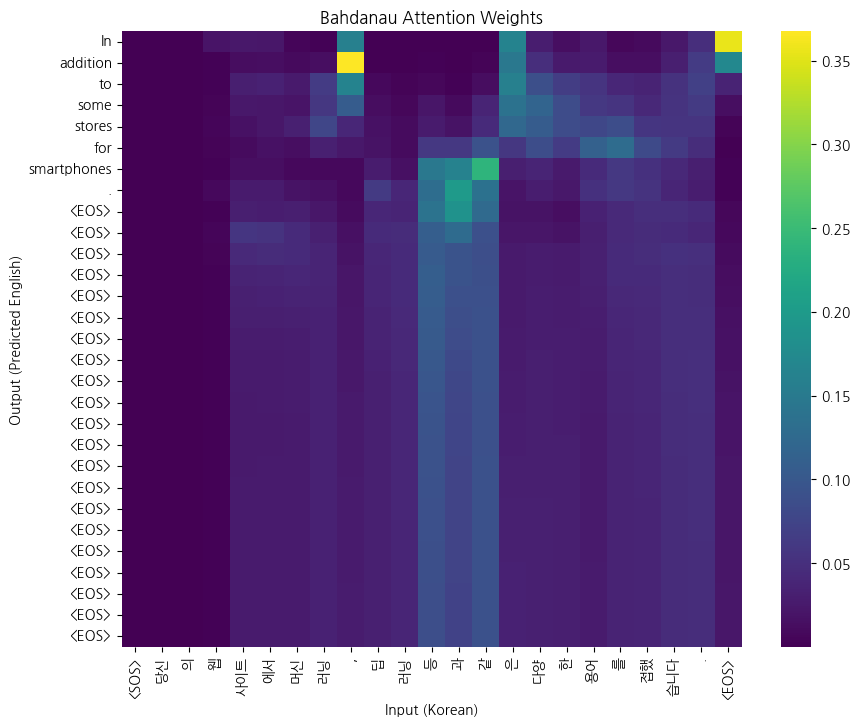

한글    : <SOS> > 어떤 스타일 을 좋아하 시 지 ? <EOS>
번역    : > Be quiet style ? <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : > What kind of style do you like ? <EOS>
--------------------------------------------------


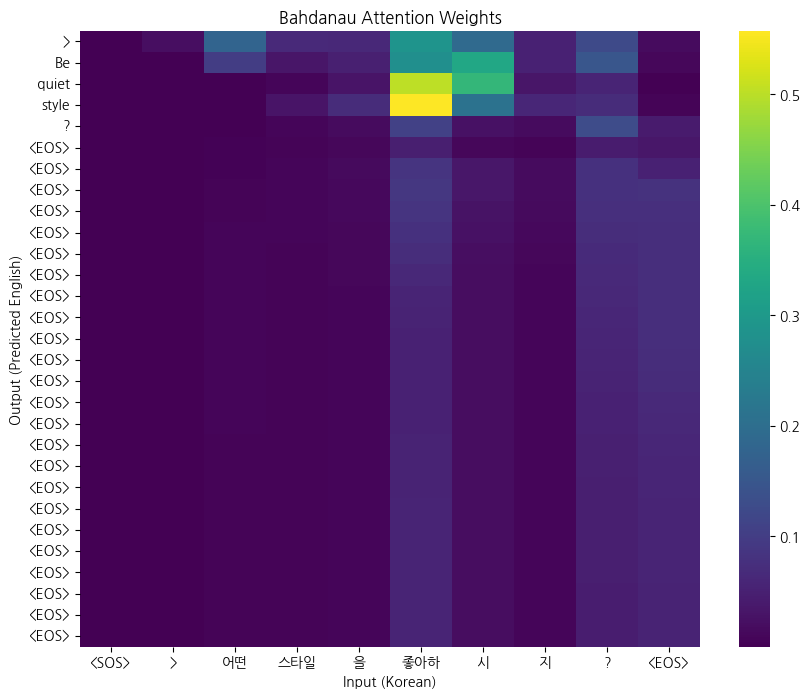

한글    : <SOS> 고객 님 , FFF 2 는 독일 국내 전용 으로 만 판매 하 고 있 습니다 . <EOS>
번역    : Good , we have to include FFF1 . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : Dear customer , FFF2 is sold exclusively in Germany . <EOS>
--------------------------------------------------


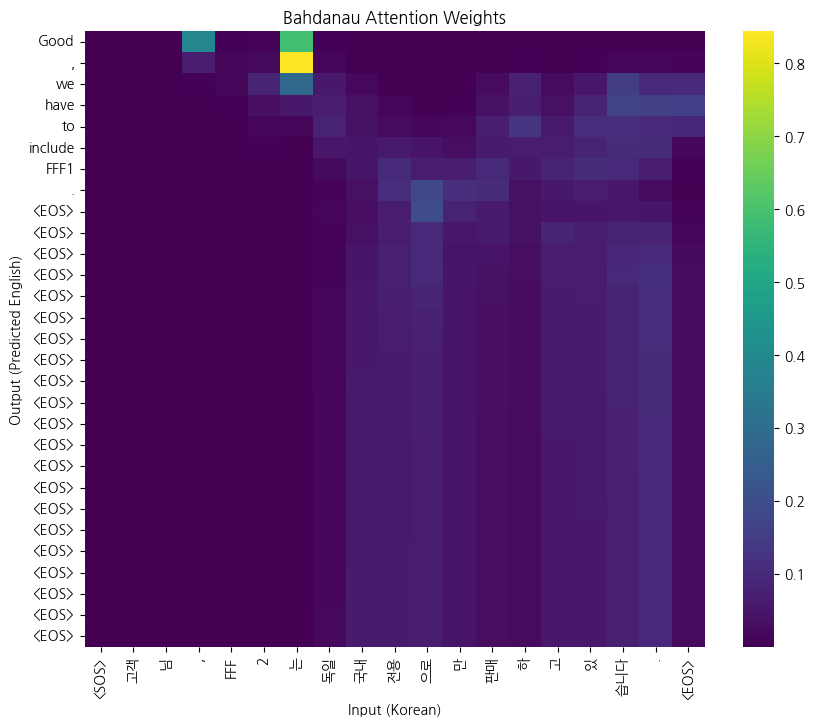

한글    : <SOS> 제 비행기 는 오후 4 시 출발 예정 입니다 . <EOS>
번역    : My flight is 4 o'clock flight . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : My flight is due to depart at 4pm . <EOS>
--------------------------------------------------


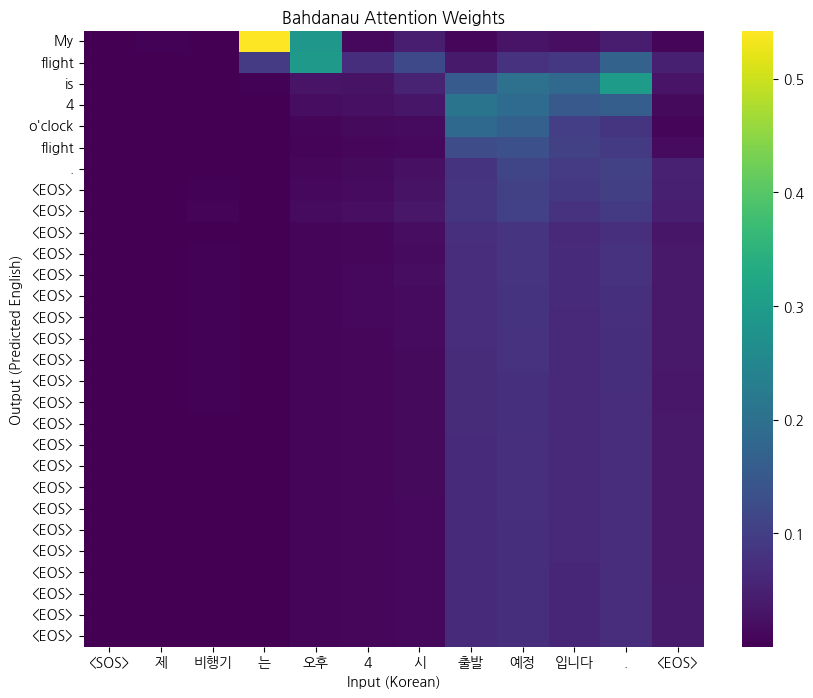

한글    : <SOS> > 응 , 같이 . <EOS>
번역    : > Yes , my . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : > Yes , together . <EOS>
--------------------------------------------------


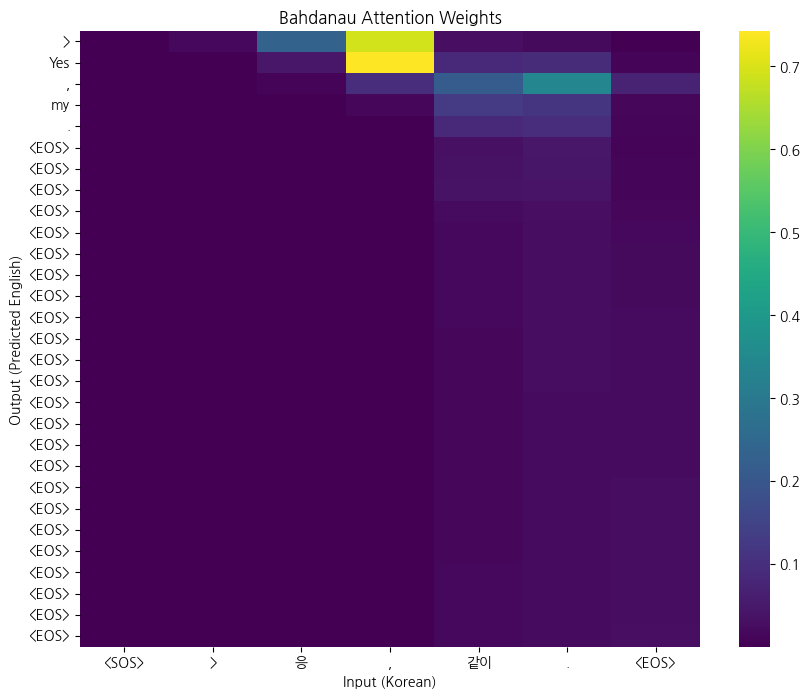

한글    : <SOS> 따라서 빠른 답변 부탁 드립니다 . <EOS>
번역    : So please reply to our . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : Therefore , please give us a quick answer . <EOS>
--------------------------------------------------


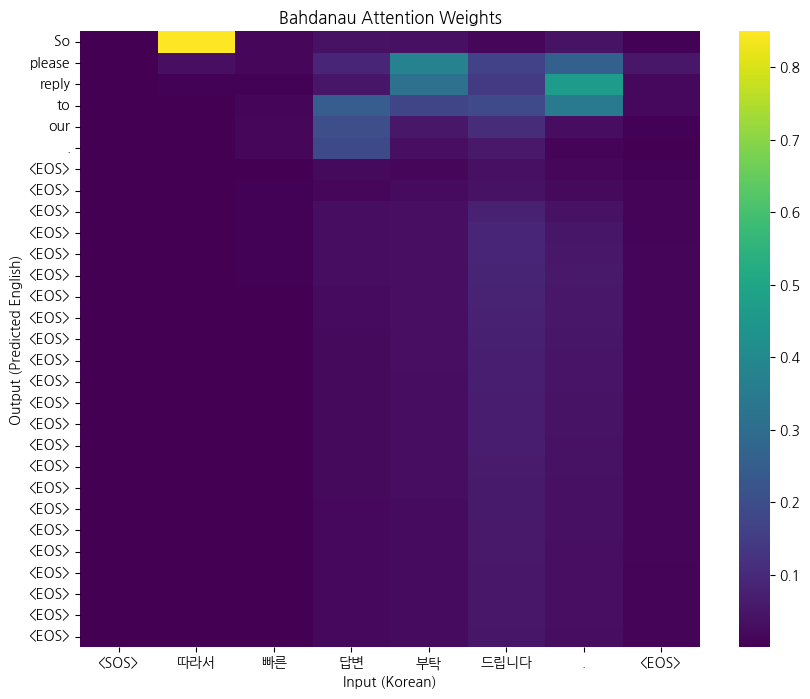

한글    : <SOS> 먹 는 거 가지 고 장난치 는 것 만큼 <UNK> 범죄 도 없 는 거 잖 아요 ? <EOS>
번역    : It 's no longer , I do n't have to ? <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : There 's no more crime than playing with food , right ? <EOS>
--------------------------------------------------


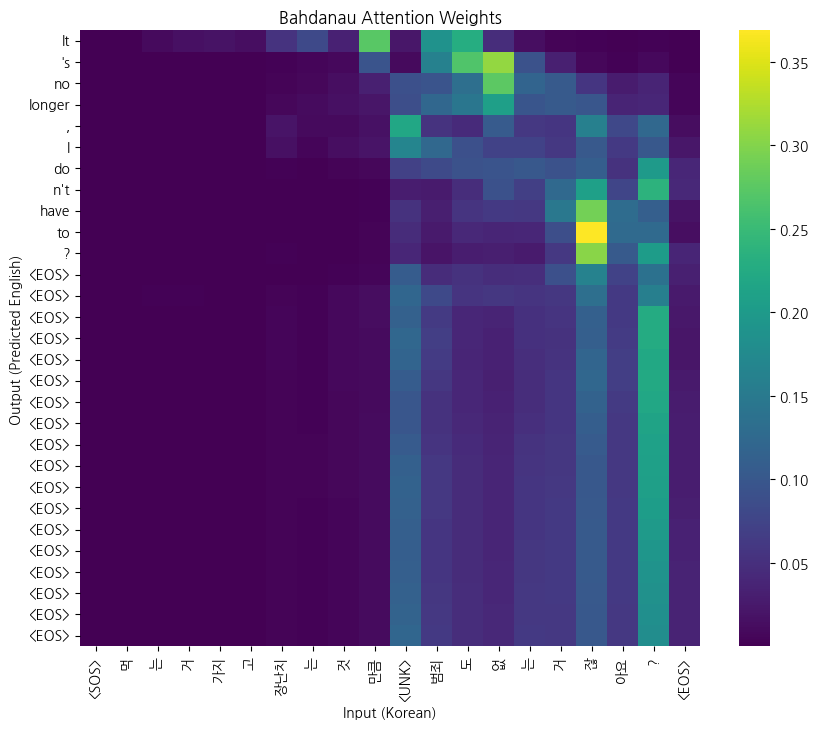

한글    : <SOS> 결함 이 있 는 제품 에 대한 불만 을 접수 했 습니다 . <EOS>
번역    : We have complained about the product . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : We have received your complaint regarding our defective products . <EOS>
--------------------------------------------------


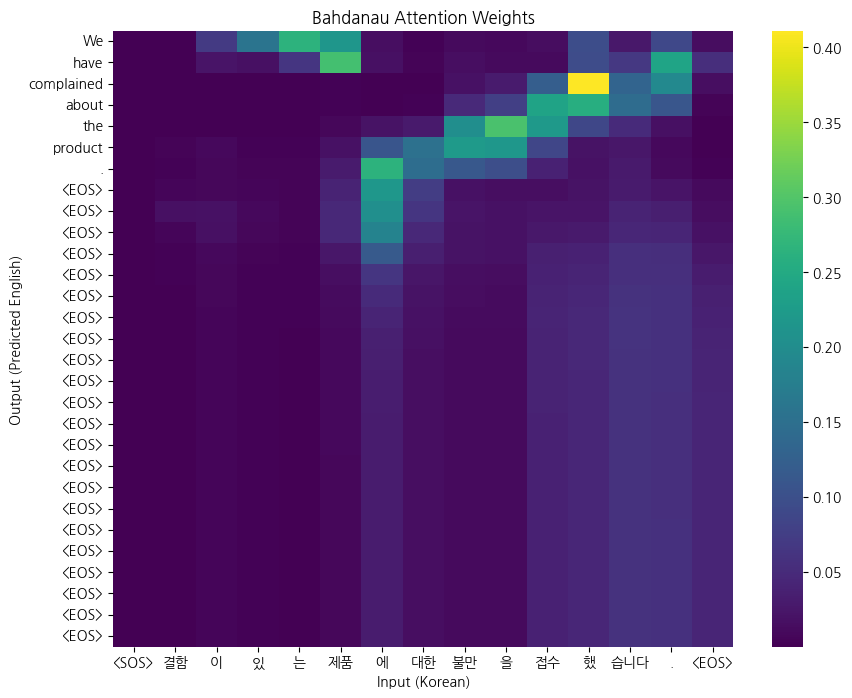

한글    : <SOS> 앞 으로 도 많 은 사람 들 의 요구 와 기대 에 부응 하 기 위해서 최선 을 다 할 것 입니다 . <EOS>
번역    : In the future , we will always repay you to <EOS> . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : We will continue to do our best to meet the needs and expectations of many people . <EOS>
--------------------------------------------------


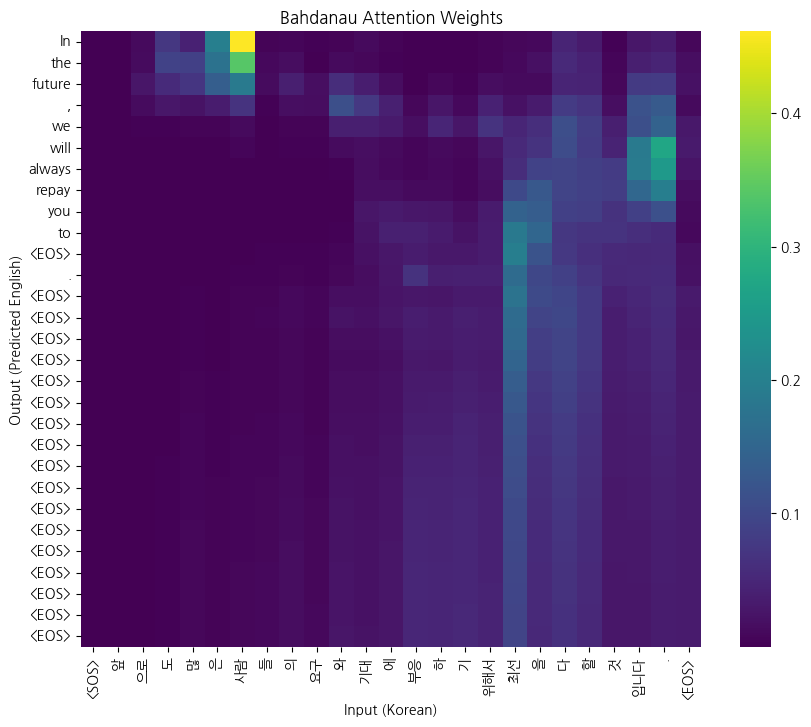

한글    : <SOS> 부작용 문제 는 매우 민감 한 문제 다 보 니 승인 에 시간 이 걸리 고 있 습니다 만 , 당연 한 결과 라 생각 하 고 기다리 고 있 습니다 . <EOS>
번역    : The is is is is is is to to the , so it 's a to look forward to the it . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : The side effects issue is a very sensitive issue , so it takes time for approval , but I think it 's a natural result and I 'm <EOS>
--------------------------------------------------


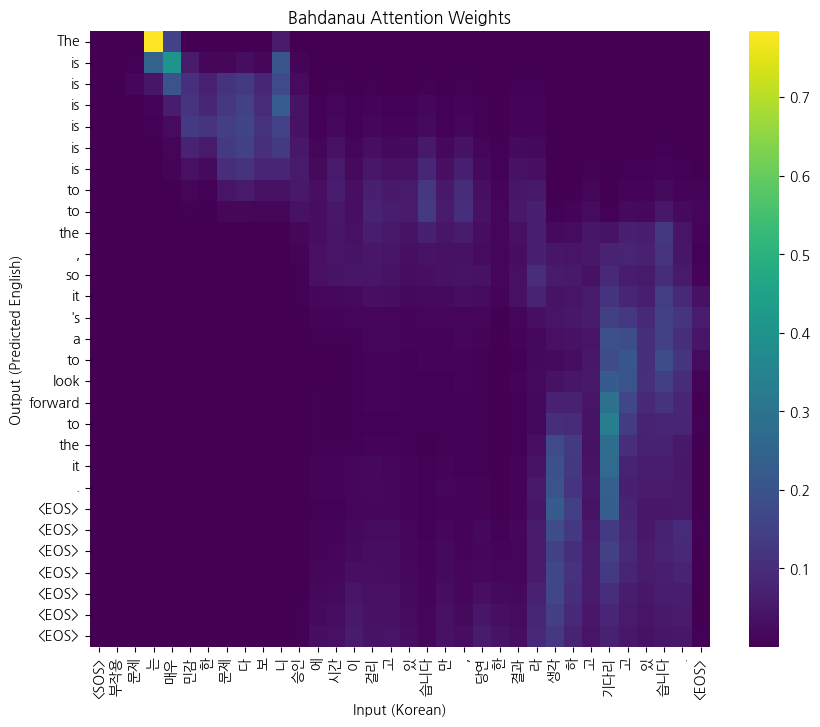

In [ ]:
translate_and_visualize_attention(model_bah, val_loader, kor_index2word, eng_index2word, device)

- 추가적인 attention 계산을 하기때문에 학습시간이 늘었지만 / 반면 val_loss는 더 낮아졌음
- 번역이 조금더 좋아진 부분이 보이고 꾀나 잘 번역한 문장도 있지만 상당수의 문장이 번역해서 의미를 전달하기에는 부족함

## LuongsAttention

In [ ]:
import torch.nn.functional as F

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, tgt, teacher_forcing_ratio=0.5):
        batch_size, tgt_len = tgt.shape
        output_dim = self.decoder.output_dim  # or self.decoder.fc_out.out_features

        outputs = torch.zeros(batch_size, tgt_len, output_dim).to(self.device)
        encoder_outputs, hidden = self.encoder(src)

        input = tgt[:, 0]  # <SOS>

        for t in range(1, tgt_len):
            output, hidden, _ = self.decoder(input, hidden, encoder_outputs)  #  수정
            outputs[:, t] = output

            top1 = output.argmax(1)  # greedy decoding
            input = tgt[:, t] if torch.rand(1).item() < teacher_forcing_ratio else top1

        return outputs

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Luong Attention (general 방식)
class LuongAttention(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.Wa = nn.Linear(hidden_dim, hidden_dim, bias=False)

    def forward(self, decoder_hidden, encoder_outputs):
        # decoder_hidden: [batch_size, hidden_dim]
        # encoder_outputs: [batch_size, src_len, hidden_dim]

        # decoder_hidden: [batch, 1, hidden_dim]
        decoder_hidden = decoder_hidden.unsqueeze(1)

        # [batch, 1, hidden_dim] x [batch, hidden_dim, src_len] -> [batch, 1, src_len]
        attn_scores = torch.bmm(self.Wa(decoder_hidden), encoder_outputs.transpose(1, 2))

        # [batch, src_len]
        attn_weights = F.softmax(attn_scores.squeeze(1), dim=1)

        # context vector: [batch, hidden_dim]
        context = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs).squeeze(1)

        return context, attn_weights

In [ ]:
class DecoderWithLuongAttention(nn.Module):
    def __init__(self, output_dim, emb_dim, enc_hidden_dim, dec_hidden_dim, attention, dropout=0.1):
        super().__init__()
        self.output_dim = output_dim
        self.attention = attention

        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.dropout = nn.Dropout(dropout)

        self.rnn_input_linear = nn.Linear(emb_dim + enc_hidden_dim, dec_hidden_dim)
        self.rnn = nn.GRU(dec_hidden_dim, dec_hidden_dim, batch_first=True)

        # 💡 context 포함해서 예측
        self.fc_out = nn.Linear(dec_hidden_dim + enc_hidden_dim, output_dim)

    def forward(self, input, hidden, encoder_outputs):
        # input: [batch]
        input = input.unsqueeze(1)  # [batch, 1]
        embedded = self.dropout(self.embedding(input))  # [batch, 1, emb_dim]

        # attention: context: [batch, enc_hidden_dim]
        context, attn_weights = self.attention(hidden.squeeze(0), encoder_outputs)

        # GRU 입력 준비: [batch, emb_dim + enc_hidden_dim]
        rnn_input = torch.cat([embedded.squeeze(1), context], dim=1)
        rnn_input = self.rnn_input_linear(rnn_input).unsqueeze(1)  # [batch, 1, dec_hidden_dim]

        output, hidden = self.rnn(rnn_input, hidden)  # output: [batch, 1, dec_hidden_dim]

        # 💡 context 포함해서 예측
        output = output.squeeze(1)  # [batch, dec_hidden_dim]
        prediction = self.fc_out(torch.cat([output, context], dim=1))  # [batch, output_dim]

        return prediction, hidden, attn_weights

In [ ]:
attention = LuongAttention(hidden_dim=HIDDEN_DIM)

decoder = DecoderWithLuongAttention(
    output_dim=OUTPUT_DIM,
    emb_dim=EMB_DIM,
    enc_hidden_dim=HIDDEN_DIM,
    dec_hidden_dim=HIDDEN_DIM,
    attention=attention,
    dropout=0.1
)

luongattention_model = Seq2Seq(encoder, decoder, device).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.Adam(luongattention_model.parameters(), lr=0.002)

In [ ]:
N_EPOCHS = 10

import time

for epoch in range(N_EPOCHS):
    start = time.time()

    train_loss = train_one_epoch(luongattention_model, train_loader, optimizer, criterion, device)
    val_loss = evaluate_one_epoch(luongattention_model, val_loader, criterion, device)

    elapsed = time.time() - start
    print(f"[Epoch {epoch+1}] Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Time: {elapsed:.2f}s")

[Epoch 1] Train Loss: 5.2956 | Val Loss: 5.1905 | Time: 123.84s


[Epoch 2] Train Loss: 4.3022 | Val Loss: 4.9721 | Time: 124.20s


[Epoch 3] Train Loss: 3.8412 | Val Loss: 4.9657 | Time: 123.88s


[Epoch 4] Train Loss: 3.5423 | Val Loss: 4.9337 | Time: 123.80s


[Epoch 5] Train Loss: 3.2855 | Val Loss: 4.9917 | Time: 123.83s


[Epoch 6] Train Loss: 3.1098 | Val Loss: 5.0134 | Time: 123.71s


KeyboardInterrupt: 

In [ ]:
def translate_and_visualize_attention(model, dataloader, kor_index2word, eng_index2word, device, max_len=30, attention_type="Luong"):
    model.eval()
    shown = 0

    with torch.no_grad():
        for src, tgt in dataloader:
            src, tgt = src.to(device), tgt.to(device)
            batch_size = src.shape[0]

            encoder_outputs, hidden = model.encoder(src)
            # hidden = hidden.squeeze(0) ← ❌ 제거!!

            input = tgt[:, 0]  # <sos>
            outputs = []
            attentions = []

            for t in range(1, max_len):
                output, hidden, attn_weights = model.decoder(input, hidden, encoder_outputs)
                top1 = output.argmax(1)
                outputs.append(top1.unsqueeze(1))
                attentions.append(attn_weights.unsqueeze(1))  # [batch, 1, src_len]
                input = top1

            outputs = torch.cat(outputs, dim=1)
            attentions = torch.cat(attentions, dim=1)

            for i in range(batch_size):
                if shown >= 10:
                    return

                src_tokens = [kor_index2word[idx.item()] for idx in src[i] if idx.item() != PAD_IDX]
                tgt_tokens = [eng_index2word[idx.item()] for idx in tgt[i][1:] if idx.item() != PAD_IDX]
                pred_tokens = [eng_index2word[idx.item()] for idx in outputs[i] if idx.item() != PAD_IDX]

                print("한글    :", ' '.join(src_tokens))
                print("번역    :", ' '.join(pred_tokens))
                print("정답    :", ' '.join(tgt_tokens))
                print("-" * 50)

                attn_map = attentions[i][:len(pred_tokens), :len(src_tokens)].cpu().numpy()

                plt.figure(figsize=(10, 8))
                sns.heatmap(attn_map, xticklabels=src_tokens, yticklabels=pred_tokens,
                            cmap='viridis', annot=False)
                plt.xlabel("Input (Korean)")
                plt.ylabel("Output (Predicted English)")
                plt.title(f"{attention_type} Attention Weights")
                plt.show()

                shown += 1

한글    : <SOS> 저희 가게 는 기존 에 예쁜 디자인 의 <UNK> 로 유명 했 습니다 . <EOS>
번역    : Our company has a famous that our has a famous for our our our our . <EOS> . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : Our store was famous for its pretty design of <UNK> . <EOS>
--------------------------------------------------


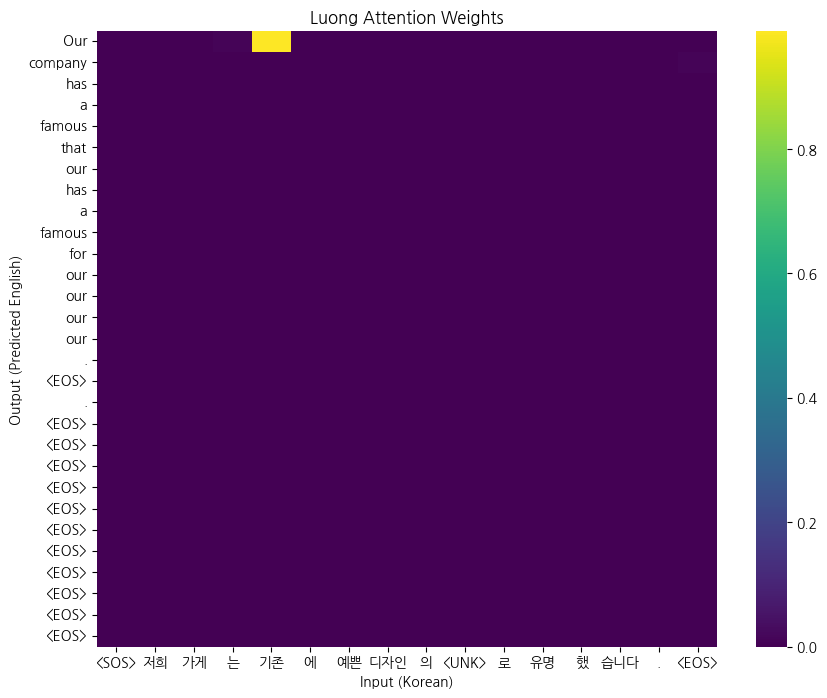

한글    : <SOS> 필링 이 필요 한 건 알 지만 각질 을 제거 한 후 자극 이 되 어 피부 가 아프 거나 민감 해 지 는 경험 이 있 어 꺼려 지 신다면 BBB 가 <EOS>
번역    : I know , you know , you use the skin , but it use the skin , but it use the skin , but it <EOS> <EOS> <EOS> <EOS>
정답    : I know you need peeling , but if you 're reluctant to get irritated or sensitive after exfoliating , try using FFF peeling gel made by BBB . <EOS>
--------------------------------------------------


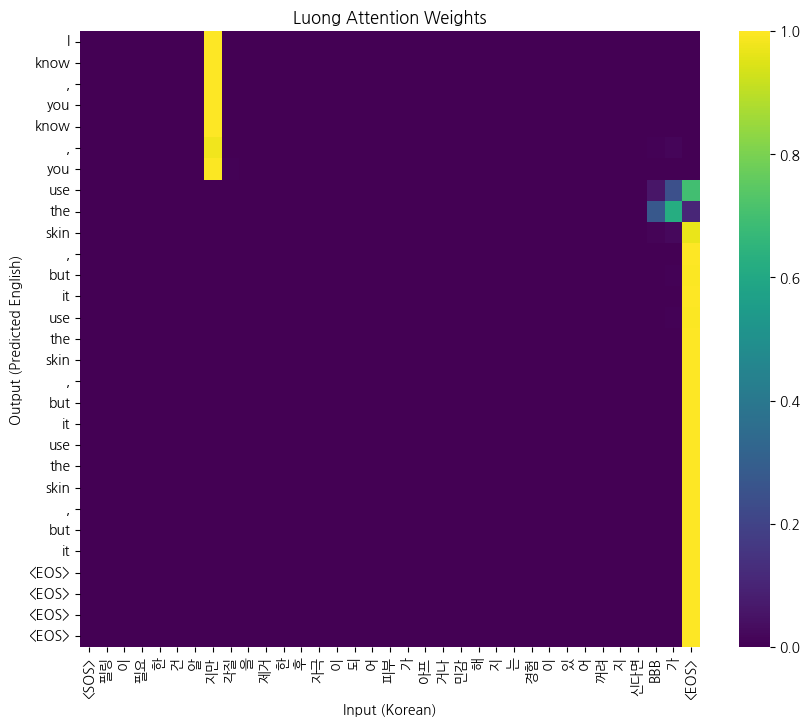

한글    : <SOS> 배터리 가 완전 충전 되 면 해당 전지 에 대한 LED 조명 이 꺼집니다 . <EOS>
번역    : When the the , the is is automatically , the is a shortage of the charging . . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : When a battery is fully charged , the LED light for that cell turns off . <EOS>
--------------------------------------------------


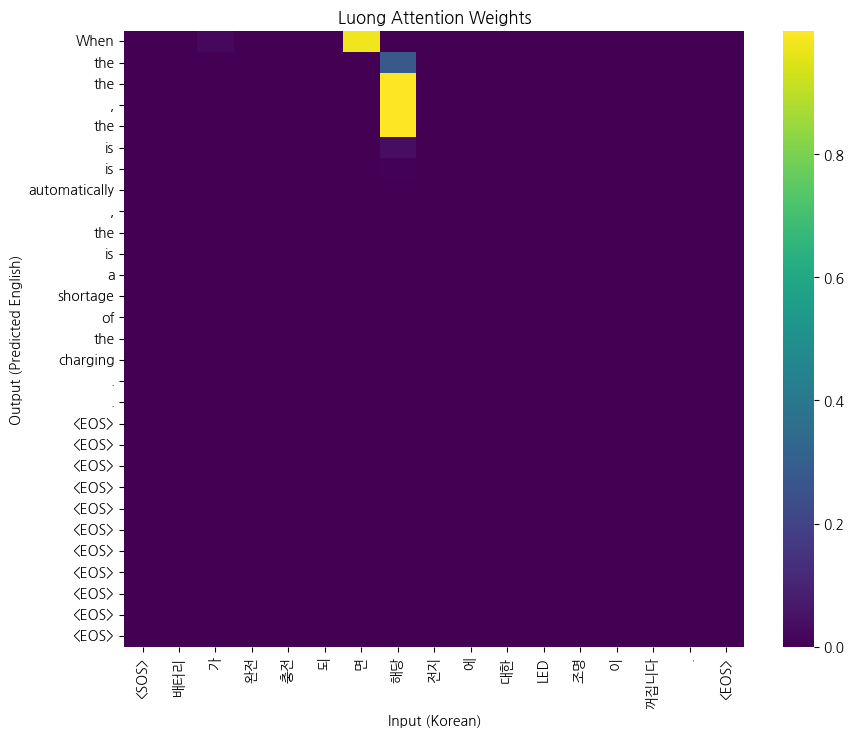

한글    : <SOS> > 뭐 야 ? <EOS>
번역    : > What is it ? <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : > What is it ? <EOS>
--------------------------------------------------


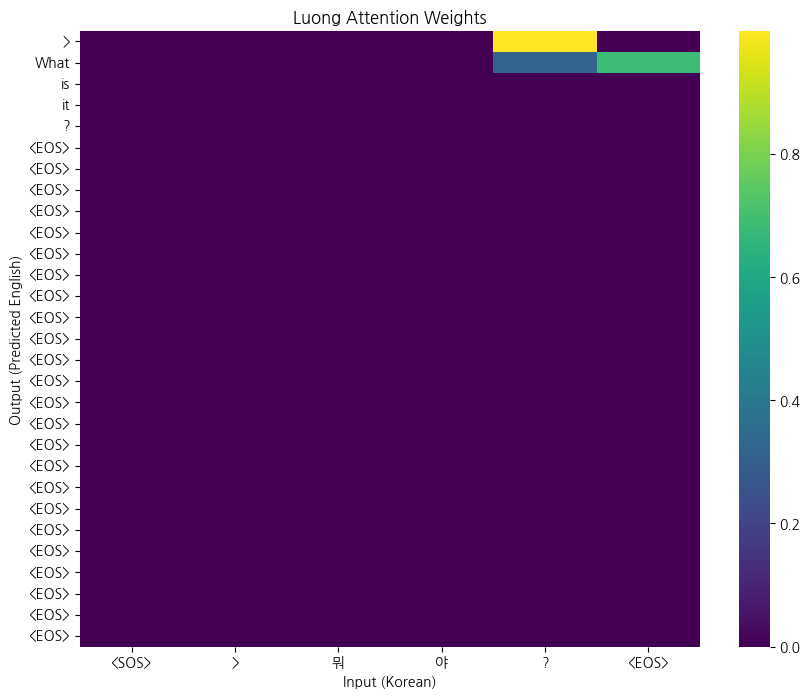

한글    : <SOS> > 밴 대지 <UNK> . <EOS>
번역    : > The 's a . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : > Hug the <UNK> . <EOS>
--------------------------------------------------


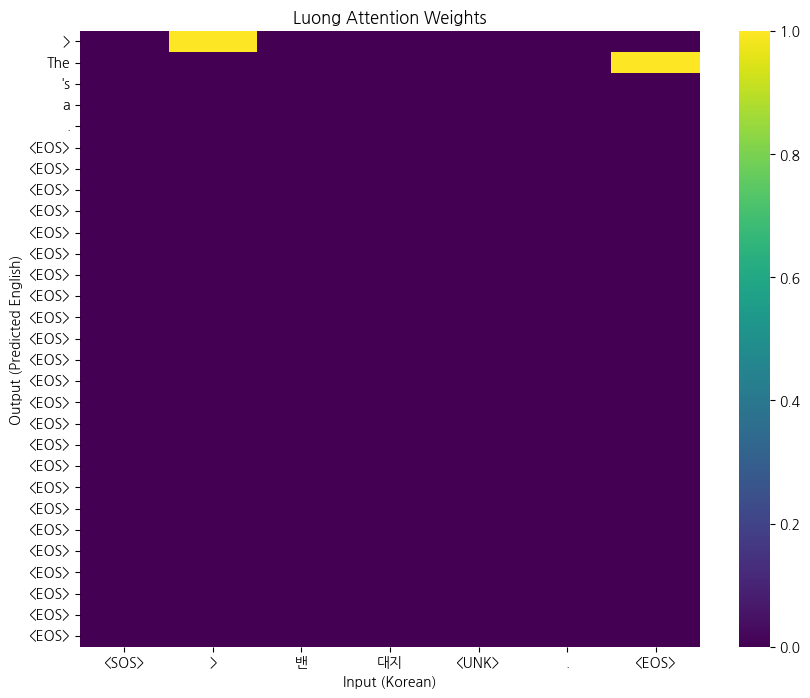

한글    : <SOS> 시스템 4 는 더 굵 고 풍성 해 보이 는 모발 을 만들 고 수분 균형 을 회복 하 는 데 도움 을 줍니다 . <EOS>
번역    : The rest and and and and and and and and and and and healthy . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : System 4 helps to create thicker , <UNK> hair and restores moisture balance . <EOS>
--------------------------------------------------


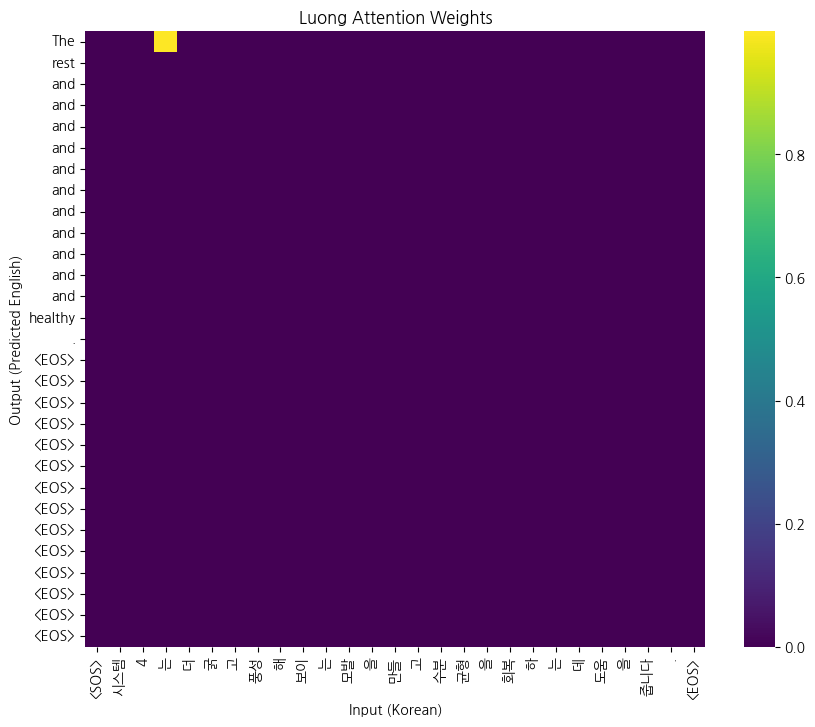

한글    : <SOS> > 너무 커서 . <EOS>
번역    : > It 's too much . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : > Because it 's too big . <EOS>
--------------------------------------------------


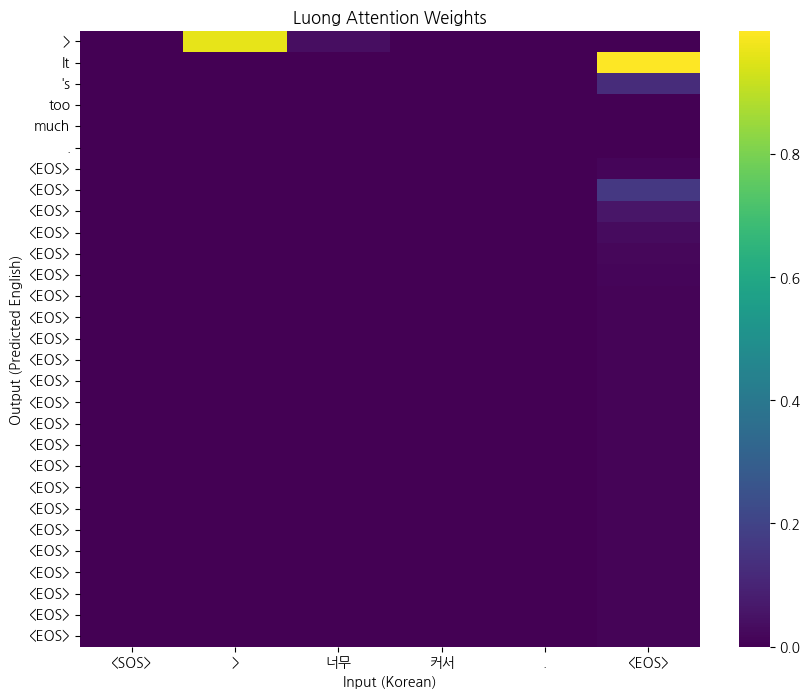

한글    : <SOS> 그거 멋지 네 . 모두 한 가지 색 으로 해 드릴까요 ? <EOS>
번역    : Would you like to make a sample of all that you would like to ? <EOS> ? <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : That 's cool . Can we do it all in one color ? <EOS>
--------------------------------------------------


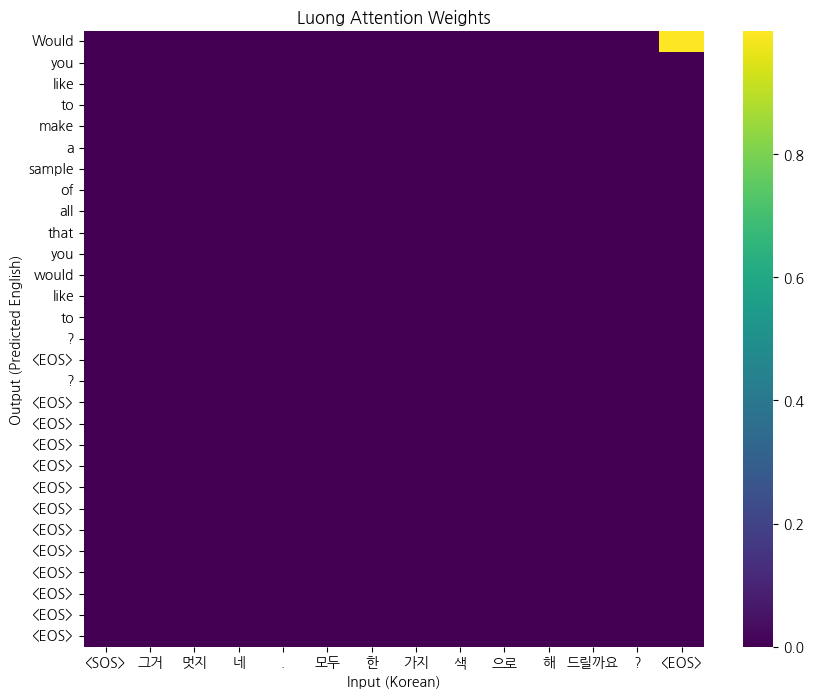

한글    : <SOS> 이용 방법 을 잘못 알려 드린 점 사과드립니다 . <EOS>
번역    : I apologize for you know that you have to apologize for the . . <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : I apologize for telling you the wrong way to use it . <EOS>
--------------------------------------------------


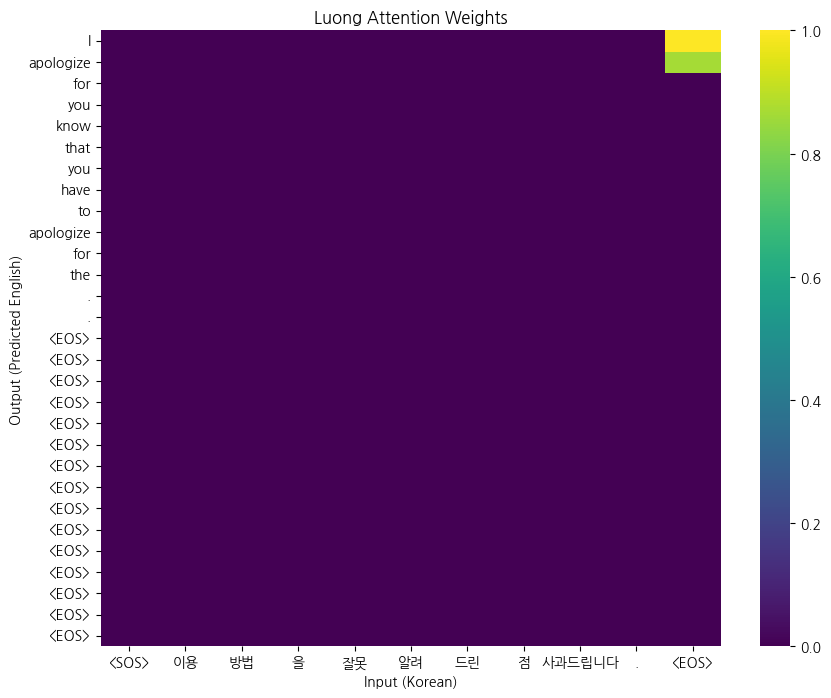

한글    : <SOS> > 아 ! <EOS>
번역    : > Ah ! <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS> <EOS>
정답    : > Ah ! <EOS>
--------------------------------------------------


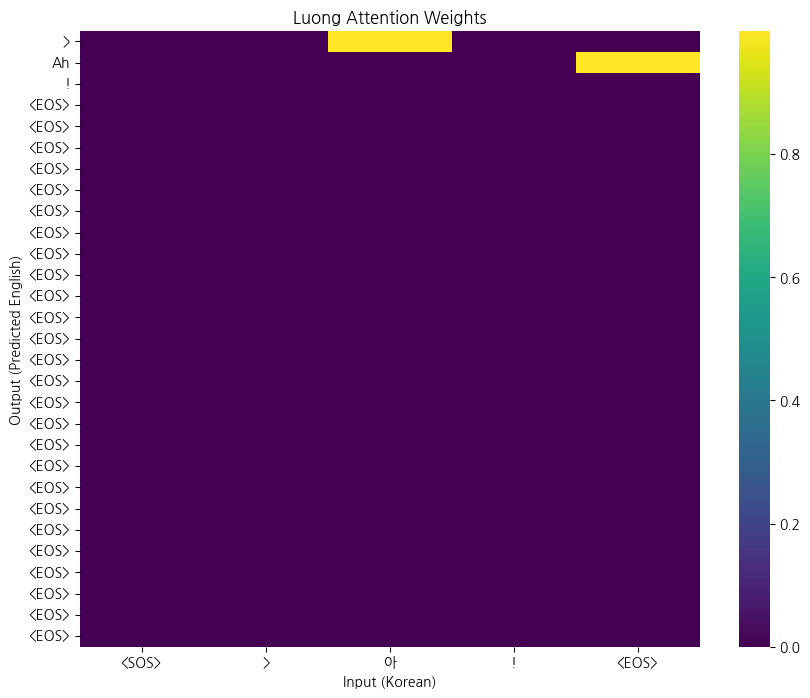

In [ ]:
translate_and_visualize_attention(luongattention_model, val_loader, kor_index2word, eng_index2word, device, attention_type="Luong")

- Bahdanau attention 계산 방법보다 속도가 조금더 빠르지만 val_loss를 비교했을때 번역 성능은 조금더 낮음을 알수있음

## Seq2Seq / Seq2Seq + Bahdanau Attention / Seq2Seq + LuongsAtten 비교
- 모델 성능 : Seq2Seq + Bahdanau Attention > Seq2Seq + LuongsAtten >  Seq2Seq
- 학습 시간 : Seq2Seq > Seq2Seq + LuongsAtten > Seq2Seq + Bahdanau Attention
- 최고 성능 : [Epoch 5] Train Loss: 3.0577 | Val Loss: 4.7929 | Time: 131.16s

- 성능 측면에서 Bahdanau Attention 모델이 가장 우수

- Bahdanau Attention은 디코더의 각 타임스텝마다 인코더의 모든 출력에 대해 학습된 방식으로 가중합을 계산하기 때문에, 더 정교한 컨텍스트 벡터를 제공함

- 이로 인해 더 정확한 번역 결과를 도출할 수 있음
→ Val Loss가 가장 낮게 나옴

- 학습 시간은 순수 Seq2Seq가 가장 빠름

- Attention이 없는 모델은 추가 연산이 없어 상대적으로 빠르게 학습됨

- 하지만 성능은 가장 낮음
→ 단순 구조가 속도 측면에서는 유리하지만, 복잡한 문장 처리에는 한계가 있음

- Luong Attention은 속도와 성능의 절충안

- Bahdanau보다는 간단한 계산 방식 (dot/general 방식 사용)으로 속도는 빠르지만, soft alignment 방식의 Bahdanau에 비해 성능이 다소 떨어짐

- 결론적으로 사실 3모델 다 좋은 품질의 번역을 해내지 못함

## 추가 실험
- 한글 전처리 방법 개선
 - 기존에는 mecab.morphs를 사용하여 한글 문장을 지나치게 세분화했기 때문에, 문장 길이가 불필요하게 길어져 성능에 부정적인 영향을 미침.
→ 이를 개선하기 위해 Okt.morphs를 사용하여 문장을 더 큰 의미 단위로 나눠서 학습 진행

- GRU 구조를 양방향(Bidirectional)으로 변경
 - 인코더에 양방향 GRU를 적용하여, 입력 문장의 양방향 문맥 정보를 모두 반영하도록 개선함.

- 평가지표로 BLEU 도입
 - 번역 품질을 보다 정량적으로 평가하기 위해 BLEU 점수를 도입하여 모델 간 비교를 명확하게 수행.

- Dropout 추가
 - Encoder와 Decoder에 Dropout을 적용하여 과적합을 방지하고 모델의 일반화 성능을 향상시킴.

- Teacher Forcing 개선
 - 고정 비율이 아닌 점진적으로 감소하는 Teacher Forcing 스케줄링 전략을 도입하여, 추론 시 안정적인 학습이 가능하도록 개선 예정.

In [9]:
import pandas as pd

# 1. 파일 불러오기
train_df = pd.read_csv("train_translation_selection_result.csv")
val_df = pd.read_csv("val_translation_selection_result.csv")

# 2. 처리 함수 정의
def prepare_data(df):
    # 1) 제외 기준 적용
    exclude_mask = (df["sim_mt"] < 0.4) & (df["sim_en"] < 0.4)
    df = df[~exclude_mask].copy()

    # 2) tgt 선택 규칙
    def choose_tgt(row):
        if row["sim_mt"] >= 0.8 and row["sim_en"] >= 0.8:
            return row["mt"]  # 둘 다 높으면 mt 우선
        elif row["sim_mt"] > row["sim_en"]:
            return row["mt"]
        else:
            return row["en"]

    df["tgt"] = df.apply(choose_tgt, axis=1)

    # 3) src = ko
    df = df.rename(columns={"ko": "src"})

    # 4) 필요한 컬럼만 반환
    return df[["src", "tgt"]]

# 3. 데이터 생성
train_data = prepare_data(train_df)
val_data = prepare_data(val_df)

# 4. 저장
train_data.to_csv("final_train_data.csv", index=False)
val_data.to_csv("final_val_data.csv", index=False)

# 5. 확인 출력
print(f" 최종 학습 데이터 수: {len(train_data)}")
print(f" 최종 검증 데이터 수: {len(val_data)}")

 최종 학습 데이터 수: 57052
 최종 검증 데이터 수: 28515


In [10]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 41.8 MB/s eta 0:00:00


In [11]:
from konlpy.tag import Okt
okt = Okt()

train_data['morphs'] = train_data['src'].apply(okt.morphs)
val_data['morphs'] = val_data['src'].apply(okt.morphs)

In [14]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

train_data['nltk'] = train_data['tgt'].apply(word_tokenize)
val_data['nltk'] = val_data['tgt'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [15]:
train_data['src_len'] = train_data['morphs'].apply(len)
train_data['tgt_len'] = train_data['nltk'].apply(len)
val_data['src_len'] = val_data['morphs'].apply(len)
val_data['tgt_len'] = val_data['nltk'].apply(len)

# 최대 길이 확인

SRC_MAX_LEN = train_data['src_len'].max()
TGT_MAX_LEN = train_data['tgt_len'].max()
print(f"src_max_len = {SRC_MAX_LEN}")
print(f"tgt_max_len = {TGT_MAX_LEN}")

SRC_MAX_LEN_val = val_data['src_len'].max()
TGT_MAX_LEN_val = val_data['tgt_len'].max()
print(f"src_max_len_val = {SRC_MAX_LEN_val}")
print(f"tgt_max_len_val = {TGT_MAX_LEN_val}")

src_max_len = 76
tgt_max_len = 75
src_max_len_val = 105
tgt_max_len_val = 119


In [19]:
import numpy as np

SRC_MAX_LEN = int(np.percentile(train_data['src_len'], 95))
TGT_MAX_LEN = int(np.percentile(train_data['tgt_len'], 95))

print(f"Truncated MAX_SRC_LEN: {SRC_MAX_LEN}")
print(f"Truncated MAX_TGT_LEN: {TGT_MAX_LEN}")

SRC_MAX_LEN_val = int(np.percentile(val_data['src_len'], 95))
TGT_MAX_LEN_val = int(np.percentile(val_data['tgt_len'], 95))

print(f"Truncated MAX_SRC_LEN_val: {SRC_MAX_LEN_val}")
print(f"Truncated MAX_TGT_LEN_val: {TGT_MAX_LEN_val}")

Truncated MAX_SRC_LEN: 23
Truncated MAX_TGT_LEN: 23
Truncated MAX_SRC_LEN_val: 23
Truncated MAX_TGT_LEN_val: 23


In [17]:
SPECIAL_TOKENS = {
    '<PAD>': 0,
    '<SOS>': 1,
    '<EOS>': 2,
    '<UNK>': 3
}

In [20]:
# 한글 어휘 사전 구축

from collections import Counter

# 단어 빈도 세기
kor_counter = Counter()
for tokens in train_data['morphs']:
    kor_counter.update(tokens)

# word2index 구성 (특수 토큰부터 시작)
kor_word2index = {token: idx for token, idx in SPECIAL_TOKENS.items()}
for word in kor_counter:
    if word not in kor_word2index:
        kor_word2index[word] = len(kor_word2index)

# index2word 구성
kor_index2word = {idx: word for word, idx in kor_word2index.items()}

In [21]:
# 영어 어휘사전 구축

eng_counter = Counter()
for tokens in train_data['nltk']:
    eng_counter.update(tokens)

eng_word2index = {token: idx for token, idx in SPECIAL_TOKENS.items()}
for word in eng_counter:
    if word not in eng_word2index:
        eng_word2index[word] = len(eng_word2index)

eng_index2word = {idx: word for word, idx in eng_word2index.items()}

In [22]:
print(" 한국어 vocab 크기:", len(kor_word2index))
print(" 영어 vocab 크기:", len(eng_word2index))

 한국어 vocab 크기: 34273
 영어 vocab 크기: 23370


In [23]:
MAX_SRC_LEN = 25
MAX_TGT_LEN = 25

PAD_IDX = 0
SOS_IDX = 1
EOS_IDX = 2
UNK_IDX = 3

In [24]:
# 토큰 리스트 → 인덱스 시퀀스로 변환

def tokens_to_indices(tokens, word2index, max_len):

    # 특수 토큰 추가
    tokens = ['<SOS>'] + tokens + ['<EOS>']

    if len(tokens) > max_len:
        tokens = tokens[:max_len-1] + ['<EOS>']

    # 인덱스 변환
    indices = [word2index.get(token, UNK_IDX) for token in tokens]

    # 길이 자르기
    indices = indices[:max_len]

    # 패딩
    pad_len = max_len - len(indices)
    indices += [PAD_IDX] * pad_len

    return indices

In [25]:
# 전체 데이터셋 인덱스 시퀸스로 변환

src_sequences = []
tgt_sequences = []

for _, row in train_data.iterrows():
    src_indices = tokens_to_indices(row['morphs'], kor_word2index, MAX_SRC_LEN)
    tgt_indices = tokens_to_indices(row['nltk'], eng_word2index, MAX_TGT_LEN)
    src_sequences.append(src_indices)
    tgt_sequences.append(tgt_indices)


val_src_sequences = []
val_tgt_sequences = []

for _, row in val_data.iterrows():
    src_indices = tokens_to_indices(row['morphs'], kor_word2index, MAX_SRC_LEN)
    tgt_indices = tokens_to_indices(row['nltk'], eng_word2index, MAX_TGT_LEN)
    val_src_sequences.append(src_indices)
    val_tgt_sequences.append(tgt_indices)

In [26]:
# 텐서로 변환

import torch

src_tensor = torch.tensor(src_sequences, dtype=torch.long)
tgt_tensor = torch.tensor(tgt_sequences, dtype=torch.long)

print(src_tensor.shape)  # [N, MAX_SRC_LEN]
print(tgt_tensor.shape)  # [N, MAX_TGT_LEN]

val_src_tensor = torch.tensor(val_src_sequences, dtype=torch.long)
val_tgt_tensor = torch.tensor(val_tgt_sequences, dtype=torch.long)

print(val_src_tensor.shape)
print(val_tgt_tensor.shape)

torch.Size([57052, 25])
torch.Size([57052, 25])
torch.Size([28515, 25])
torch.Size([28515, 25])


In [27]:
# ensorDataset & DataLoader 구성

from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(src_tensor, tgt_tensor)
val_dataset = TensorDataset(val_src_tensor, val_tgt_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)

In [36]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hidden_dim, pad_idx, dropout=0.3):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, emb_dim, padding_idx=pad_idx)
        self.dropout = nn.Dropout(dropout)
        self.gru = nn.GRU(emb_dim, hidden_dim, batch_first=True, bidirectional=True)

    def forward(self, src):
        embedded = self.dropout(self.embedding(src))  # [batch, src_len, emb_dim]
        outputs, hidden = self.gru(embedded)  # outputs: [batch, src_len, hidden_dim * 2]
        # hidden: [2, batch, hidden_dim] → forward/backward
        hidden = torch.cat((hidden[-2], hidden[-1]), dim=1)  # [batch, hidden_dim * 2]
        return outputs, hidden

In [37]:
class BahdanauAttention(nn.Module):
    def __init__(self, enc_hidden_dim, dec_hidden_dim):
        super().__init__()
        self.Wa = nn.Linear(enc_hidden_dim, dec_hidden_dim)
        self.Ua = nn.Linear(dec_hidden_dim, dec_hidden_dim)
        self.va = nn.Linear(dec_hidden_dim, 1)

    def forward(self, decoder_hidden, encoder_outputs):
        # decoder_hidden: [batch, dec_hidden_dim]
        # encoder_outputs: [batch, src_len, enc_hidden_dim]

        src_len = encoder_outputs.size(1)
        decoder_hidden = decoder_hidden.unsqueeze(1).repeat(1, src_len, 1)  # [batch, src_len, dec_hidden_dim]
        energy = torch.tanh(self.Wa(encoder_outputs) + self.Ua(decoder_hidden))  # [batch, src_len, dec_hidden_dim]
        scores = self.va(energy).squeeze(2)  # [batch, src_len]
        attn_weights = F.softmax(scores, dim=1)
        context = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs).squeeze(1)  # [batch, enc_hidden_dim]
        return context, attn_weights

In [38]:
class DecoderWithBahdanau(nn.Module):
    def __init__(self, output_dim, emb_dim, enc_hidden_dim, dec_hidden_dim, attention, dropout=0.3):
        super().__init__()
        self.output_dim = output_dim
        self.attention = attention
        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.dropout = nn.Dropout(dropout)

        self.gru = nn.GRU(enc_hidden_dim + emb_dim, dec_hidden_dim, batch_first=True)
        self.fc_out = nn.Linear(enc_hidden_dim + emb_dim + dec_hidden_dim, output_dim)

        # projection to match decoder hidden_dim
        self.init_hidden_proj = nn.Linear(enc_hidden_dim, dec_hidden_dim)

    def forward(self, input, hidden, encoder_outputs):
        # input: [batch]
        input = input.unsqueeze(1)  # [batch, 1]
        embedded = self.dropout(self.embedding(input))  # [batch, 1, emb_dim]

        context, attn_weights = self.attention(hidden, encoder_outputs)  # context: [batch, enc_hidden_dim]
        context = context.unsqueeze(1)  # [batch, 1, enc_hidden_dim]

        rnn_input = torch.cat((embedded, context), dim=2)  # [batch, 1, emb_dim + enc_hidden_dim]
        output, hidden = self.gru(rnn_input, hidden.unsqueeze(0))  # hidden: [1, batch, dec_hidden_dim]
        output = output.squeeze(1)
        hidden = hidden.squeeze(0)
        embedded = embedded.squeeze(1)
        context = context.squeeze(1)

        pred = self.fc_out(torch.cat((output, context, embedded), dim=1))  # [batch, output_dim]
        return pred, hidden, attn_weights

In [39]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        self.output_dim = decoder.output_dim

    def forward(self, src, tgt, teacher_forcing_ratio=0.5):
        batch_size, tgt_len = tgt.shape
        outputs = torch.zeros(batch_size, tgt_len, self.output_dim).to(self.device)

        encoder_outputs, enc_hidden = self.encoder(src)  # enc_hidden: [batch, enc_hidden_dim]
        dec_hidden = self.decoder.init_hidden_proj(enc_hidden)  # [batch, dec_hidden_dim]

        input = tgt[:, 0]  # <SOS>

        for t in range(1, tgt_len):
            output, dec_hidden, _ = self.decoder(input, dec_hidden, encoder_outputs)
            outputs[:, t] = output
            teacher_force = torch.rand(1).item() < teacher_forcing_ratio
            input = tgt[:, t] if teacher_force else output.argmax(1)

        return outputs

In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

INPUT_DIM = len(kor_word2index)
OUTPUT_DIM = len(eng_word2index)
EMB_DIM = 128
HIDDEN_DIM = 128
DROPOUT = 0.3

encoder = Encoder(INPUT_DIM, EMB_DIM, HIDDEN_DIM, PAD_IDX, dropout=DROPOUT)
attention = BahdanauAttention(enc_hidden_dim=HIDDEN_DIM * 2, dec_hidden_dim=HIDDEN_DIM)
decoder = DecoderWithBahdanau(OUTPUT_DIM, EMB_DIM, HIDDEN_DIM * 2, HIDDEN_DIM, attention, dropout=DROPOUT)

model_bah = Seq2Seq(encoder, decoder, device).to(device)

criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.Adam(model_bah.parameters(), lr=0.002)

In [41]:
from nltk.translate.bleu_score import corpus_bleu

def decode_indices(indices_batch, index2word):
    """
    인덱스 시퀀스 → 토큰 시퀀스 변환
    PAD/EOS 이후는 잘라냄
    """
    results = []
    for indices in indices_batch:
        sentence = []
        for idx in indices:
            word = index2word.get(idx.item(), '<UNK>')
            if word == '<EOS>':
                break
            if word != '<PAD>' and word != '<SOS>':
                sentence.append(word)
        results.append(sentence)
    return results

In [42]:
def get_teacher_forcing_ratio(epoch, total_epochs, start=1.0, end=0.5):
    """
    epoch: 현재 에폭 (1부터 시작)
    total_epochs: 전체 에폭 수
    start: 초기 teacher forcing 비율
    end: 마지막 teacher forcing 비율
    """
    return max(end, start - (start - end) * (epoch / total_epochs))

In [47]:
import torch.nn.functional as F

In [48]:
import time

N_EPOCHS = 10
best_val_loss = float('inf')

for epoch in range(1, N_EPOCHS + 1):
    start = time.time()
    tf_ratio = get_teacher_forcing_ratio(epoch, N_EPOCHS, start=1.0, end=0.5)

    train_loss = train_one_epoch(model_bah, train_loader, optimizer, criterion, device, teacher_forcing_ratio=tf_ratio)
    val_loss = evaluate_one_epoch(model_bah, val_loader, criterion, device)

    # 🔹 BLEU 평가
    model_bah.eval()
    references = []
    hypotheses = []

    with torch.no_grad():
        for src, tgt in val_loader:
            src, tgt = src.to(device), tgt.to(device)
            output = model_bah(src, tgt, teacher_forcing_ratio=0.0)
            pred_tokens = output.argmax(2)
            decoded_preds = decode_indices(pred_tokens, eng_index2word)
            decoded_targets = decode_indices(tgt, eng_index2word)
            hypotheses.extend(decoded_preds)
            references.extend([[t] for t in decoded_targets])  # 정답 감싸야 함

    bleu = corpus_bleu(references, hypotheses) * 100
    elapsed = time.time() - start

    print(f"[Epoch {epoch}] 🔺Train Loss: {train_loss:.4f} | 🔹Val Loss: {val_loss:.4f} | 🟢BLEU: {bleu:.2f} | TF: {tf_ratio:.2f} | ⏱Time: {elapsed:.2f}s")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model_bah.state_dict(), "best_model_bah.pt")

[Epoch 1] 🔺Train Loss: 4.8890 | 🔹Val Loss: 6.1395 | 🟢BLEU: 5.57 | TF: 0.95 | ⏱Time: 159.64s


[Epoch 2] 🔺Train Loss: 3.7983 | 🔹Val Loss: 5.7473 | 🟢BLEU: 8.40 | TF: 0.90 | ⏱Time: 158.30s


[Epoch 3] 🔺Train Loss: 3.3173 | 🔹Val Loss: 5.5950 | 🟢BLEU: 9.78 | TF: 0.85 | ⏱Time: 159.28s


[Epoch 4] 🔺Train Loss: 3.0465 | 🔹Val Loss: 5.4814 | 🟢BLEU: 10.75 | TF: 0.80 | ⏱Time: 158.28s


[Epoch 5] 🔺Train Loss: 2.8528 | 🔹Val Loss: 5.4058 | 🟢BLEU: 11.31 | TF: 0.75 | ⏱Time: 158.83s


[Epoch 6] 🔺Train Loss: 2.7773 | 🔹Val Loss: 5.3216 | 🟢BLEU: 11.71 | TF: 0.70 | ⏱Time: 159.56s


[Epoch 7] 🔺Train Loss: 2.7391 | 🔹Val Loss: 5.1917 | 🟢BLEU: 11.87 | TF: 0.65 | ⏱Time: 159.58s


[Epoch 8] 🔺Train Loss: 2.7082 | 🔹Val Loss: 5.1031 | 🟢BLEU: 11.94 | TF: 0.60 | ⏱Time: 158.76s


[Epoch 9] 🔺Train Loss: 2.6956 | 🔹Val Loss: 5.0910 | 🟢BLEU: 12.00 | TF: 0.55 | ⏱Time: 158.70s


[Epoch 10] 🔺Train Loss: 2.7419 | 🔹Val Loss: 4.9398 | 🟢BLEU: 11.92 | TF: 0.50 | ⏱Time: 159.52s


In [49]:
for epoch in range(11, 21):  # 10 에폭 추가
    start = time.time()
    tf_ratio = get_teacher_forcing_ratio(epoch, 20, start=1.0, end=0.5)

    train_loss = train_one_epoch(model_bah, train_loader, optimizer, criterion, device, teacher_forcing_ratio=tf_ratio)
    val_loss = evaluate_one_epoch(model_bah, val_loader, criterion, device)

    # BLEU 평가
    model_bah.eval()
    references = []
    hypotheses = []

    with torch.no_grad():
        for src, tgt in val_loader:
            src, tgt = src.to(device), tgt.to(device)
            output = model_bah(src, tgt, teacher_forcing_ratio=0.0)
            pred_tokens = output.argmax(2)
            decoded_preds = decode_indices(pred_tokens, eng_index2word)
            decoded_targets = decode_indices(tgt, eng_index2word)
            hypotheses.extend(decoded_preds)
            references.extend([[t] for t in decoded_targets])

    bleu = corpus_bleu(references, hypotheses) * 100
    elapsed = time.time() - start

    print(f"[Epoch {epoch}] 🔺Train Loss: {train_loss:.4f} | 🔹Val Loss: {val_loss:.4f} | 🟢BLEU: {bleu:.2f} | TF: {tf_ratio:.2f} | ⏱Time: {elapsed:.2f}s")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model_bah.state_dict(), "best_model_bah.pt")

[Epoch 11] 🔺Train Loss: 2.2772 | 🔹Val Loss: 5.3427 | 🟢BLEU: 12.96 | TF: 0.72 | ⏱Time: 158.83s


[Epoch 12] 🔺Train Loss: 2.2310 | 🔹Val Loss: 5.3345 | 🟢BLEU: 13.21 | TF: 0.70 | ⏱Time: 159.35s


[Epoch 13] 🔺Train Loss: 2.2345 | 🔹Val Loss: 5.3322 | 🟢BLEU: 13.55 | TF: 0.68 | ⏱Time: 159.35s


[Epoch 14] 🔺Train Loss: 2.2254 | 🔹Val Loss: 5.3137 | 🟢BLEU: 13.52 | TF: 0.65 | ⏱Time: 159.66s


[Epoch 15] 🔺Train Loss: 2.2167 | 🔹Val Loss: 5.3053 | 🟢BLEU: 13.63 | TF: 0.62 | ⏱Time: 159.32s


[Epoch 16] 🔺Train Loss: 2.2288 | 🔹Val Loss: 5.2329 | 🟢BLEU: 13.57 | TF: 0.60 | ⏱Time: 159.98s


[Epoch 17] 🔺Train Loss: 2.2457 | 🔹Val Loss: 5.2311 | 🟢BLEU: 13.87 | TF: 0.57 | ⏱Time: 159.29s


[Epoch 18] 🔺Train Loss: 2.2499 | 🔹Val Loss: 5.1815 | 🟢BLEU: 13.61 | TF: 0.55 | ⏱Time: 160.09s


[Epoch 19] 🔺Train Loss: 2.2527 | 🔹Val Loss: 5.1861 | 🟢BLEU: 13.81 | TF: 0.53 | ⏱Time: 160.30s


[Epoch 20] 🔺Train Loss: 2.2621 | 🔹Val Loss: 5.1653 | 🟢BLEU: 13.63 | TF: 0.50 | ⏱Time: 161.14s


In [54]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction

def evaluate_on_validation(model, val_loader, kor_index2word, eng_index2word, device):
    model.eval()
    hypotheses = []
    references = []
    src_texts = []

    with torch.no_grad():
        for src, tgt in val_loader:
            src, tgt = src.to(device), tgt.to(device)
            output = model(src, tgt, teacher_forcing_ratio=0.0)  # 추론

            pred_tokens = output.argmax(2)  # [batch_size, tgt_len]

            # 디코딩
            pred_sentences = decode_indices(pred_tokens, eng_index2word)
            tgt_sentences = decode_indices(tgt, eng_index2word)
            src_sentences = decode_indices(src, kor_index2word)

            hypotheses.extend(pred_sentences)
            references.extend([[ref] for ref in tgt_sentences])
            src_texts.extend(src_sentences)

    # BLEU 계산
    bleu = corpus_bleu(references, hypotheses, smoothing_function=SmoothingFunction().method1) * 100
    print(f"\n Validation BLEU: {bleu:.2f}\n")

    # 예시 출력
    print(" 예시 예측 결과 (한글 원문 → 정답 → 예측):\n")
    for i in range(20):
        print(f" 입력   : {' '.join(src_texts[i])}")
        print(f" 정답   : {' '.join(references[i][0])}")
        print(f" 예측   : {' '.join(hypotheses[i])}")
        print()

    return bleu

In [56]:
evaluate_on_validation(model_bah, val_loader, kor_index2word, eng_index2word, device)


 Validation BLEU: 13.63

🔍 예시 예측 결과 (한글 원문 → 정답 → 예측):

 입력   : > 오 , 깜짝 이야 , 씨 .
 정답   : > Oh , scared me . Seed .
 예측   : > Oh , my .

 입력   : 귀사 의 복합기 상품 의 가장 큰 장점 은 잉크 를 리필 할 수 있다는 것 입니다 .
 정답   : The biggest advantage of your multifunctional products is that they can refill ink .
 예측   : Another biggest advantage of your company 's product is a device .

 입력   : > 이 거 봐요 .
 정답   : > Look at this .
 예측   : > Look .

 입력   : <UNK> 은 어떤 식물 인가요 ?
 정답   : What kind of plant is <UNK> ?
 예측   : What kind of is ?

 입력   : > 오 , 뭔가 나오는데 ?
 정답   : > Oh , something 's coming out .
 예측   : > Oh , something something something ?

 입력   : 부동산 웹사이트 이름 이 스튜디오 닷 컴 이 맞을까요 ?
 정답   : Is the real estate website called <UNK> ?
 예측   : Are you saying that the website for the website ?

 입력   : 동물 애호가 등 의 여러가지 이유 로 동물 유래 성분 을 일절 사용 하지 않은 완전 채식 적 염색 약 입니다 .
 정답   : It is a completely vegetarian dye that does not use any <UNK> ingredients for various reasons such as animal lovers .
 예측   : It is a dye tha

13.625843068750829

## 실험 결과 요약 및 향후 개선 방향 제안

1. 형태소 분석기 변경 (MeCab → Okt)

형태소 분석기를 MeCab에서 Okt로 변경한 결과,
전체 문장 길이는 줄어들었지만, 오히려 vocab size는 증가하는 현상이 나타남.

이는 Okt가 의미 단위 기준으로 더 다양한 단어를 분리하는 경향이 있어,
단어 수는 줄어들지만 희소 단어(unique token) 수가 늘어난 것으로 해석됨.

---

2. 성능 지표 변화

Val Loss는 학습을 지속해도 뚜렷한 감소세를 보이지 않음

반면 BLEU 점수는 5.57 → 13.61로 의미 있는 향상을 보였음

이는 모델이 문장 구조를 조금씩 학습하고 있다는 신호

하지만 BLEU 13.6은 아직 "보통 수준(15점 이상)"에 못 미치며,
실제 사용 가능한 수준으로는 부족함

---

3. 모델 구조에 대한 의심

현재 사용 중인 embedding_dim = 128은 vocab_size가 30,000인 상황에서 상대적으로 작은 값임

임베딩 차원이 너무 작으면:

단어 간 의미 표현력이 부족하고

디코더에서 정답 단어를 구분하기 어려움

따라서 향후 실험에서는 embedding_dim을 256 또는 512로 증가시키는 것이 필요

---

4. Val Loss 개선 불가 원인 분석

인코더/디코더에 전달되는 입력 형식은 디버깅을 통해 확인 과정을 거쳤음

그럼에도 불구하고 Val Loss가 개선되지 않는 이유는 다음 중 하나일 가능성이 있음:

CrossEntropyLoss 계산 방식이 token 단위로 정확히 평균되고 있는지 재점검 필요

모델의 capacity(hdim, embdim)가 전반적으로 부족할 가능성
